# Линейные модели в машинном обучении

Описание проекта:

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
  - Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
  - Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
- С помощью модели нужно отобрать коров по двум критериям:
  - средний удой за год — не менее 6000 килограммов;
  - молоко должно быть вкусным.

В данном проекте будут выполняться следующие задачи:
  - загрузка данных
  - выполняем предобработку данных:
    - приведение данных к нормальному типу данных проверка наличие пропусков и дублей
  - проведем исследовательский анализ:
    - статистический анализ всех признаков
    - построим графики для для всех признаков
    - отчистим от выбросов
  - Корреляционный анализ данных
    - рассчитаем коэффициенты корреляции между всеми признаками
    - Построим диаграммы рассеяния для Удоя кг на остальные признаки
  - обучение модели линейной регрессии
    - построим 3  модели линейной регресии для прогноза Удоя кг для данных из таблицы  ferma_main
      применим лучшую модель к датасету cow_buy для прогноза Удоя Кг
  - Обучение модели логической регрессии
    - построим модель класификации для нахождения параментры "вкус молока" для основной таблицы а затем применим данную модель к данным из таблицы cow_buy




Описание данных
  - Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:
    - id — уникальный идентификатор коровы.
    - Удой, кг — масса молока, которую корова даёт в год (в килограммах).
    - ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
    - Сырой протеин, г — содержание сырого протеина в корме (в граммах).
    - СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
    - Порода — порода коровы.
    - Тип пастбища — ландшафт лугов, на которых паслась корова.
    - порода папы_быка — порода папы коровы.
    - Жирность,% — содержание жиров в молоке (в процентах).
    - Белок,% — содержание белков в молоке (в процентах).
    - Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
    - Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

  - Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера.
  Описание данных:
    - id — уникальный идентификатор коровы.
    - Имя Папы — имя папы коровы.

  - Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
    - Порода — порода коровы.
    - Тип пастбища — ландшафт лугов, на которых паслась корова.
    - порода папы_быка — порода папы коровы.
    - Имя_папы — имя папы коровы.
    - Текущая_жирность,% — содержание жиров в молоке (в процентах).
    - Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
    - Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).


## Загрузка данных



In [467]:
# Импортироуем библиотеки с которыми будем работать

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,LogisticRegression

from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler,Binarizer ,OneHotEncoder

from sklearn.metrics import r2_score, accuracy_score, recall_score, precision_score, mean_squared_error ,mean_absolute_error
from sklearn.metrics import confusion_matrix

from sklearn.dummy import DummyClassifier, DummyRegressor


from scipy.stats import pearsonr



In [468]:

import warnings
warnings.filterwarnings("ignore")

In [470]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
except:
    pass

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Читаем файлы

Записываем данный в отдельные переменные

In [471]:
try:
    data_cow = pd.read_csv('/datasets/cow_buy.csv' , sep  = ';', decimal=',')
except:
    pathik = '/content/drive/MyDrive/colab практикум/6_project/cow_buy.csv'
    data_cow = pd.read_csv(pathik, sep  = ';', decimal=',')

In [472]:
try:
    data_dad = pd.read_csv('/datasets/ferma_dad.csv' , sep  = ';', decimal=',')
except:
    pathik = '/content/drive/MyDrive/colab практикум/6_project/ferma_dad.csv'
    data_dad = pd.read_csv(pathik, sep  = ';', decimal=',')

In [473]:
try:
    data_main = pd.read_csv('/datasets/ferma_main.csv' , sep  = ';', decimal=',')
except:
    pathik = '/content/drive/MyDrive/colab практикум/6_project/ferma_main.csv'
    data_main = pd.read_csv(pathik, sep  = ';', decimal=',')

### Выводим общую информац

In [474]:
# функция для вывода общей инфомации

def df_info(df):
  print("Info:")
  print(df.info())
  print("\n")

  print("Describe:")
  print(df.describe())
  print("\n")

  print("First 5 elements:")
  display(df.head())

In [475]:
df_info(data_cow)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB
None


Describe:
       Текущая_жирность,%  Текущий_уровень_белок,%
count           20.000000                20.000000
mean             3.577500                 3.069500
std              0.126818                 0.010339
min              3.340000                 3.046000
25%              3.510000                 3.064000
50%              3.590000      

Порода Тип пастбища порода папы_быка  Имя_папы  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный   
2  РефлешнСоверинг    равнинное          Соверин     Барин   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный   

   Текущая_жирность,%  Текущий_уровень_белок,%      Возраст  
0                3.58                    3.076  более_2_лет  
1                3.54                    3.081  менее_2_лет  
2                3.59                    3.074  более_2_лет  
3                3.40                    3.061  более_2_лет  
4                3.64                    3.074  более_2_лет

In [476]:
df_info(data_dad)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None


Describe:
              id
count  629.00000
mean   315.00000
std    181.72094
min      1.00000
25%    158.00000
50%    315.00000
75%    472.00000
max    629.00000


First 5 elements:


id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

In [477]:
df_info(data_main)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  

id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                   14.2              1743   
1   2      5529                                   12.8              2138   
2   3      5810                                   14.0              1854   
3   4      5895                                   12.4              2012   
4   5      5302                                   12.8              1675   

   СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0.890   Вис Бик Айдиал    Равнинное   
1                                 0.890   Вис Бик Айдиал    Равнинные   
2                                 0.885  РефлешнСоверинг    Холмистое   
3                                 0.885  РефлешнСоверинг    Холмистое   
4                                 0.885   Вис Бик Айдиал    Равнинные   

  порода папы_быка  Жирность,%  Белок,% Вкус молока      Возраст  
0           Айдиал        3.58    3.076      вкусно  более_2_лет  
1          Соверин        3.54    3.079      вкусно  менее_2_лет  
2          Соверин        3.59    3.074   не вкусно  более_2_лет  
3           Айдиал        3.40    3.075   не вкусно  более_2_лет  
4          Соверин        3.73    3.073      вкусно  менее_2_лет

вывод: на данном этапе были успешно загружены и прочитаны основые характеристики 3х таблиц.

## Предобработка данных

проверяем наличие пропусков, затем правим типы данных в толбцах. после изминения в каждой таблице проверяем что все успешно

### Правим типы данных для таблицы data_cow

In [478]:
data_cow.isna().sum()

Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
Возраст                    0
dtype: int64

In [479]:
data_cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [480]:
# Правим типи данных чтобы тексовоые значение лежали в string
data_cow['Порода'] = data_cow['Порода'].astype('string')
data_cow['Тип пастбища'] = data_cow['Тип пастбища'].astype('string')
data_cow['порода папы_быка'] = data_cow['порода папы_быка'].astype('string')
data_cow['Имя_папы'] = data_cow['Имя_папы'].astype('string')
data_cow['Возраст'] = data_cow['Возраст'].astype('string')


# прави названия столбцов призкаов под уже готовую модель
data_cow.rename(columns={'Текущая_жирность,%' : 'жирность %'}, inplace=True)
data_cow.rename(columns={'Текущий_уровень_белок,%': 'белок %'}, inplace=True)
data_cow.head()



data_cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Порода            20 non-null     string 
 1   Тип пастбища      20 non-null     string 
 2   порода папы_быка  20 non-null     string 
 3   Имя_папы          20 non-null     string 
 4   жирность %        20 non-null     float64
 5   белок %           20 non-null     float64
 6   Возраст           20 non-null     string 
dtypes: float64(2), string(5)
memory usage: 1.2 KB


### Правим типы данных для таблицы data_dad

In [481]:
data_dad.isna().sum()

id          0
Имя Папы    0
dtype: int64

In [482]:
data_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [483]:
data_dad['Имя Папы'] = data_dad['Имя Папы'].astype('string')
data_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    string
dtypes: int64(1), string(1)
memory usage: 10.0 KB


### Правим типы данных для таблицы data_main

In [484]:
data_main.isna().sum()

id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64

In [485]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [486]:
data_main['Тип пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [487]:
data_main['Тип пастбища'] = data_main['Тип пастбища'].apply(lambda x: 'Равнинное' if x == 'Равнинные' else x)
data_main['Тип пастбища'].unique()

array(['Равнинное', 'Холмистое'], dtype=object)

In [488]:
data_main['Порода'] = data_main['Порода'].astype('string')
data_main['Тип пастбища'] = data_main['Тип пастбища'].astype('string')
data_main['порода папы_быка'] = data_main['порода папы_быка'].astype('string')
data_main['Вкус молока'] = data_main['Вкус молока'].astype('string')
data_main['Возраст'] = data_main['Возраст'].astype('string')




data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    string 
 6   Тип пастбища                           634 non-null    string 
 7   порода папы_быка                       634 non-null    string 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    string 
 11  Возрас

Вывод. успешно поравили типы данных, провели наличе пропусков

### Правка названий стобцов

Приводим названия слолбцов более простой вид, избавляемся от заглавных, двоийных пробелов и доп символов

In [489]:
data_main.columns = data_main.columns.str.lower()
data_cow.columns = data_cow.columns.str.lower()
data_dad.columns = data_dad.columns.str.lower()


data_main.columns = data_main.columns.str.replace(',', ' ')
data_main.columns = data_main.columns.str.replace('_', ' ')
data_main.columns = data_main.columns.str.replace('  ', ' ')

data_cow.columns = data_cow.columns.str.replace(',', ' ')
data_cow.columns = data_cow.columns.str.replace('_', ' ')
data_cow.columns = data_cow.columns.str.replace('  ', ' ')



data_main['тип пастбища'] = data_main['тип пастбища'].str.lower()
data_cow['тип пастбища'] = data_cow['тип пастбища'].str.lower()


###  Проверяем наличие дублей

In [490]:
data_main.duplicated().sum()

5

In [491]:
data_main[data_main.duplicated(subset=['id','удой кг','эке (энергетическая кормовая единица)','сырой протеин г', 'спо (сахаро-протеиновое соотношение)',\
                                       'порода', 'тип пастбища','порода папы быка','жирность %','белок %','вкус молока' ,'возраст' ],keep=False)]

id  удой кг  эке (энергетическая кормовая единица)  сырой протеин г  \
626  627     5970                                   14.4             1837   
629  627     5970                                   14.4             1837   
630  627     5970                                   14.4             1837   
631  627     5970                                   14.4             1837   
632  627     5970                                   14.4             1837   
633  627     5970                                   14.4             1837   

     спо (сахаро-протеиновое соотношение)           порода тип пастбища  \
626                                  0.88  РефлешнСоверинг    холмистое   
629                                  0.88  РефлешнСоверинг    холмистое   
630                                  0.88  РефлешнСоверинг    холмистое   
631                                  0.88  РефлешнСоверинг    холмистое   
632                                  0.88  РефлешнСоверинг    холмистое   
633                                  0.88  РефлешнСоверинг    холмистое   

    порода папы быка  жирность %  белок % вкус молока      возраст  
626          Соверин        3.64    3.075   не вкусно  более_2_лет  
629          Соверин        3.64    3.075   не вкусно  более_2_лет  
630          Соверин        3.64    3.075   не вкусно  более_2_лет  
631          Соверин        3.64    3.075   не вкусно  более_2_лет  
632          Соверин        3.64    3.075   не вкусно  более_2_лет  
633          Соверин        3.64    3.075   не вкусно  более_2_лет

In [492]:
data_main = data_main.drop_duplicates()

In [493]:
data_main.duplicated().sum()

0

In [494]:
data_cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   порода            20 non-null     string 
 1   тип пастбища      20 non-null     string 
 2   порода папы быка  20 non-null     string 
 3   имя папы          20 non-null     string 
 4   жирность %        20 non-null     float64
 5   белок %           20 non-null     float64
 6   возраст           20 non-null     string 
dtypes: float64(2), string(5)
memory usage: 1.2 KB


Вывод :data_main отчистили от явных дубликатов  

In [495]:
data_cow[data_cow.duplicated(subset=['порода','тип пастбища','порода папы быка','имя папы', 'жирность %', 'белок %', 'возраст' ],keep=False)]

порода тип пастбища порода папы быка  имя папы  жирность %  \
0    Вис Бик Айдиал    холмистое           Айдиал  Геркулес        3.58   
2   РефлешнСоверинг    равнинное          Соверин     Барин        3.59   
4   РефлешнСоверинг    равнинное           Айдиал    Буйный        3.64   
6    Вис Бик Айдиал    холмистое           Айдиал  Геркулес        3.58   
8   РефлешнСоверинг    равнинное          Соверин     Барин        3.59   
14  РефлешнСоверинг    равнинное          Соверин     Барин        3.59   
19  РефлешнСоверинг    равнинное           Айдиал    Буйный        3.64   

    белок %      возраст  
0     3.076  более_2_лет  
2     3.074  более_2_лет  
4     3.074  более_2_лет  
6     3.076  более_2_лет  
8     3.074  более_2_лет  
14    3.074  более_2_лет  
19    3.074  более_2_лет

In [496]:
data_cow = data_cow.drop_duplicates()


Вывод :data_cow отчистили от явных дубликатов

In [497]:
data_dad.duplicated().sum()

0

Вывод data_dad тут нету очевидных дублей

Вывод в предобработке мы выпаолнили приведение типв даных к номармальным, поправили названия столбцов, поправили наименование в типе пастбища на общее значение. Избавились от дубликатов.

## Исследовательский анализ данных

Посмотрим как распределяются количесветвенные данные в таблице data_main

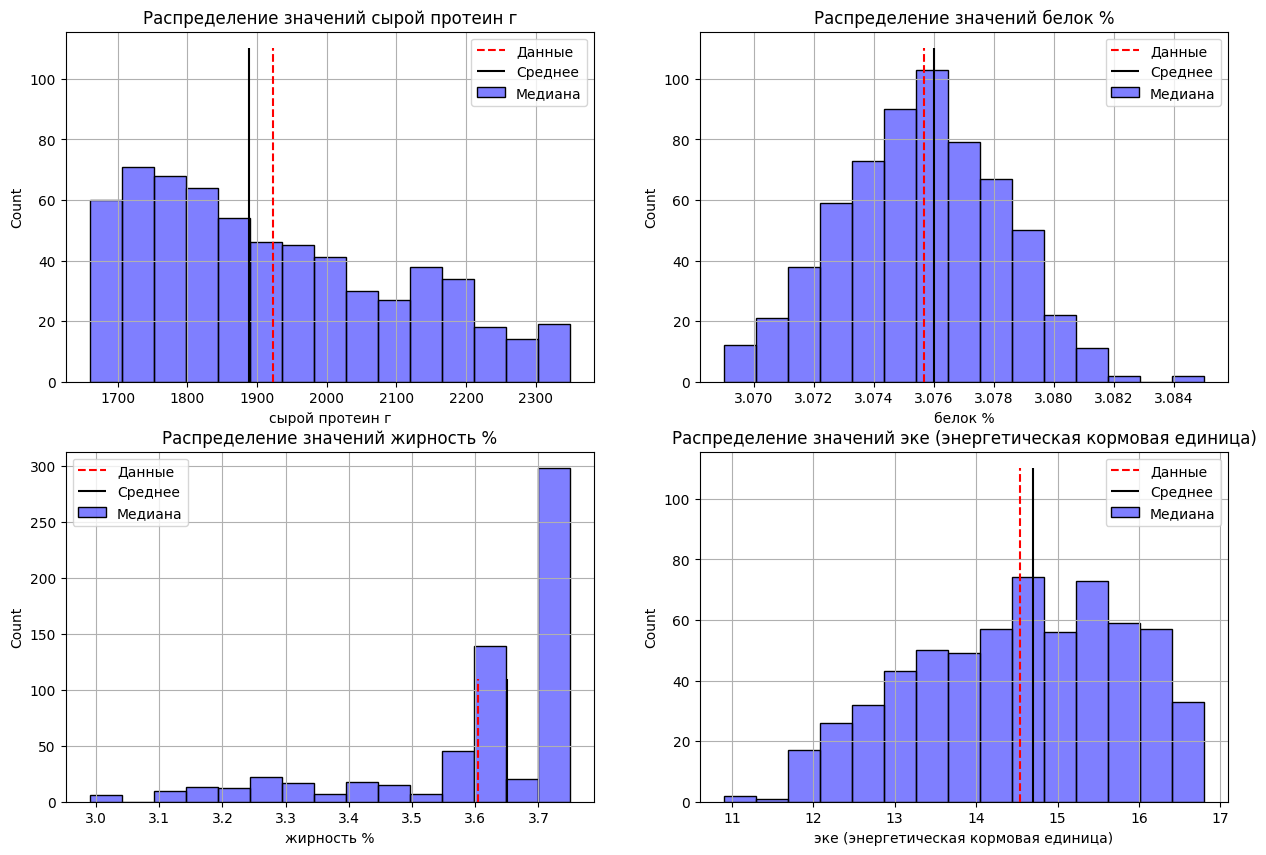

In [412]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

col_type = ['сырой протеин г', 'белок %', 'жирность %', 'эке (энергетическая кормовая единица)']

for i, variable in enumerate(col_type):
    row, col = i // 2, i % 2

    sns.histplot(data=data_main, x=variable, bins=15, color='blue', alpha=0.5, ax=axes[row, col])
    axes[row, col].set_title(f'Распределение значений {variable}')

    mean = data_main[variable].mean()
    median = data_main[variable].median()
    axes[row, col].grid()
    axes[row, col].vlines(mean, 0, 110, colors='red', linestyles='--', label='Среднее')
    axes[row, col].vlines(median, 0, 110, colors='black', label='Медиана')
    axes[row, col].legend(('Данные', 'Среднее', 'Медиана'))

plt.show()

Правим аномалию по Удою кг в таблице data_main

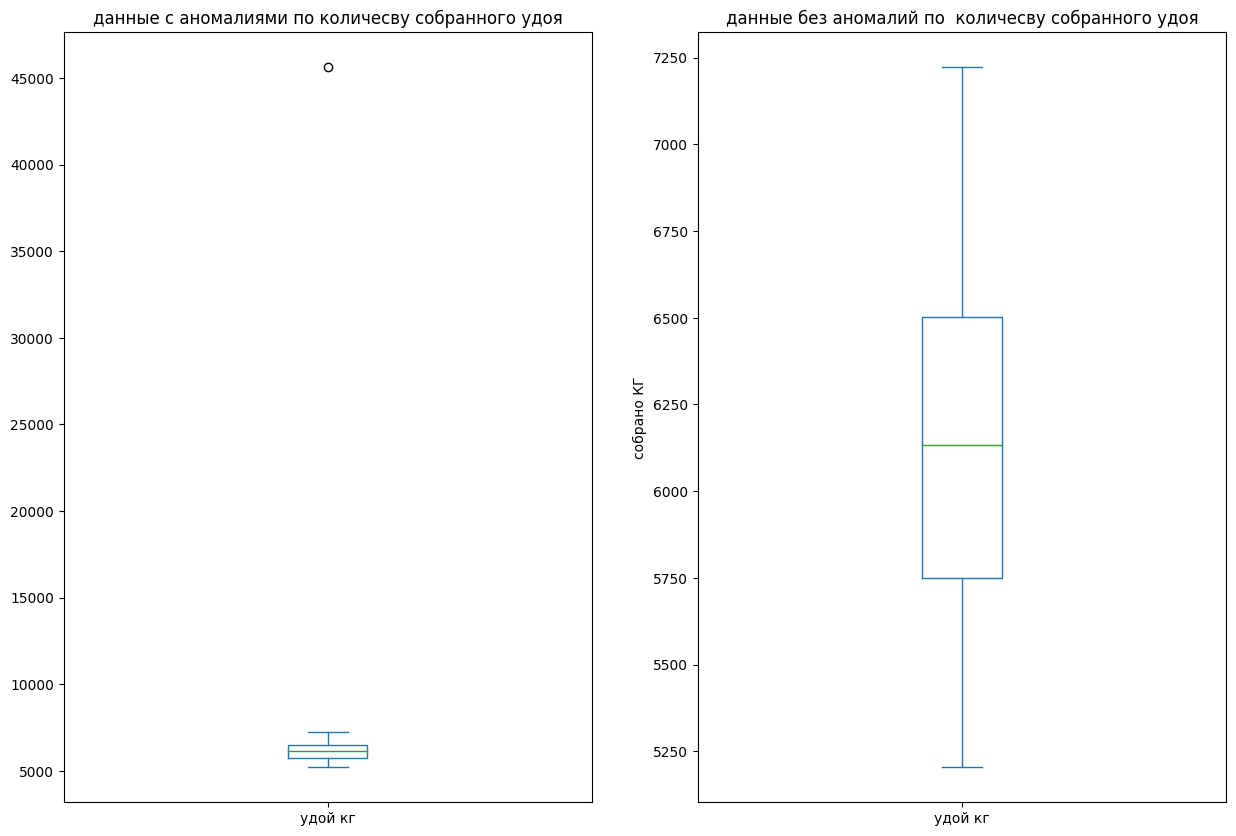

В данном случе бы срезано 1 строк 


In [413]:
df_copy = data_main.copy()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
data_main['удой кг'].plot(kind= 'box', ax=axes[0])
axes[0].set_title('данные c аномалиями по количесву собранного удоя')
x = len(data_main)

Q1 = df_copy['удой кг'].quantile(0.1)
Q3 = df_copy['удой кг'].quantile(0.9)
IQR = Q3 - Q1

# находим верхнею и нижнею грань
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

#удаляем выбросы
data_main = df_copy[(df_copy['удой кг'] >= lower) & (df_copy['удой кг'] <= upper)]


data_main['удой кг'].plot(kind= 'box', ax=axes[1])
axes[1].set_title('данные без аномалий по  количесву собранного удоя')
plt.ylabel('собрано КГ')
plt.show()
print(f'В данном случе бы срезано {x  - len(data_main)} строк ')


Посмотрим как распределяются категорийные данные в таблице data_main

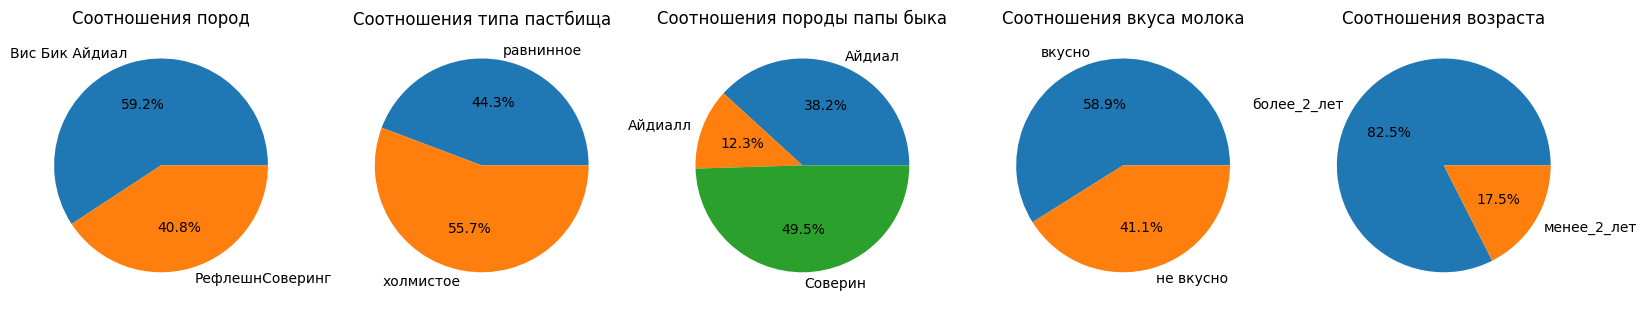

In [414]:
res1 = data_main.pivot_table(index='порода', values='id', aggfunc='count').reset_index()
res2 = data_main.pivot_table(index='тип пастбища', values='id', aggfunc='count').reset_index()
res3 = data_main.pivot_table(index='порода папы быка', values='id', aggfunc='count').reset_index()
res4 = data_main.pivot_table(index='вкус молока', values='id', aggfunc='count').reset_index()
res5 = data_main.pivot_table(index='возраст', values='id', aggfunc='count').reset_index()

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,10))

axes[0].pie(res1['id'], labels=res1['порода'], autopct='%1.1f%%')
axes[1].pie(res2['id'], labels=res2['тип пастбища'], autopct='%1.1f%%')
axes[2].pie(res3['id'], labels=res3['порода папы быка'], autopct='%1.1f%%')
axes[3].pie(res4['id'], labels=res4['вкус молока'], autopct='%1.1f%%')
axes[4].pie(res5['id'], labels=res5['возраст'], autopct='%1.1f%%')

axes[0].set_title('Соотношения пород')
axes[1].set_title('Соотношения типа пастбища')
axes[2].set_title('Соотношения породы папы быка')
axes[3].set_title('Соотношения вкуса молока')
axes[4].set_title('Соотношения возраста')

plt.show()



Вывод:
в таблице data_main

количесвенные данные распределяются не равномерно на графике, у показателя Удой кг была аномалия по сверх больших, от нее избавились. Близко к нормальному распределны показатели в графике белок %. На графике сырой протеин г данные распределы  хуже, там нету очевидной моды данных. график показатель питетельности коровы скошен влево. что говорит что данные так же не равномерно расположены. На графике Жирность % видимо что данные совсем не равномерно расположеные ( далее проведем отчиску от аномалий).  Так же отчистили аномалии по графику Удой кн. Суммарно было удалено <10%  

в таблице data_main
в категорийных данный видно что некоторые признаки имют примерно равное соотношение, а в некоторых показателях так же имеются данные по 4-12%


Посмотрим как распределяются категорийные данные в таблице data_cow

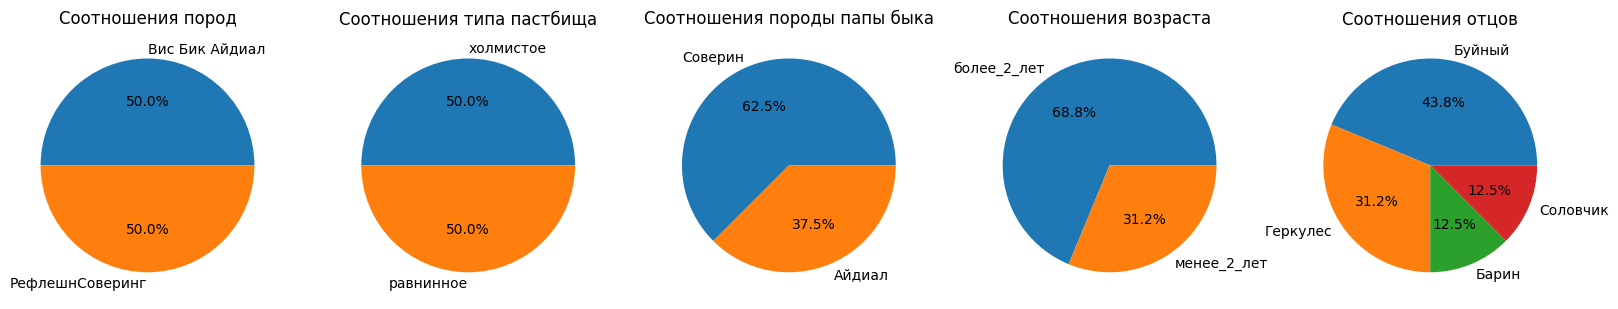

In [415]:
res1 = data_cow['порода'].value_counts().reset_index()
res2 = data_cow['тип пастбища'].value_counts().reset_index()
res3 = data_cow['порода папы быка'].value_counts().reset_index()
res4 = data_cow['возраст'].value_counts().reset_index()
res5 = data_cow['имя папы'].value_counts().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,10))

# по адресам  .
axes[0].pie(res1['count'], labels=res1['порода'], autopct='%1.1f%%')
axes[1].pie(res2['count'], labels=res2['тип пастбища'], autopct='%1.1f%%')
axes[2].pie(res3['count'], labels=res3['порода папы быка'], autopct='%1.1f%%')
axes[3].pie(res4['count'], labels=res4['возраст'], autopct='%1.1f%%')
axes[4].pie(res5['count'], labels=res5['имя папы'], autopct='%1.1f%%')


#  заголовки
axes[0].set_title('Соотношения пород')
axes[1].set_title('Соотношения типа пастбища')
axes[2].set_title('Соотношения породы папы быка')
axes[3].set_title('Соотношения возраста')
axes[4].set_title('Соотношения отцов')

plt.show()


Посмотрим как распределяются количесвенные данные в таблице data_cow

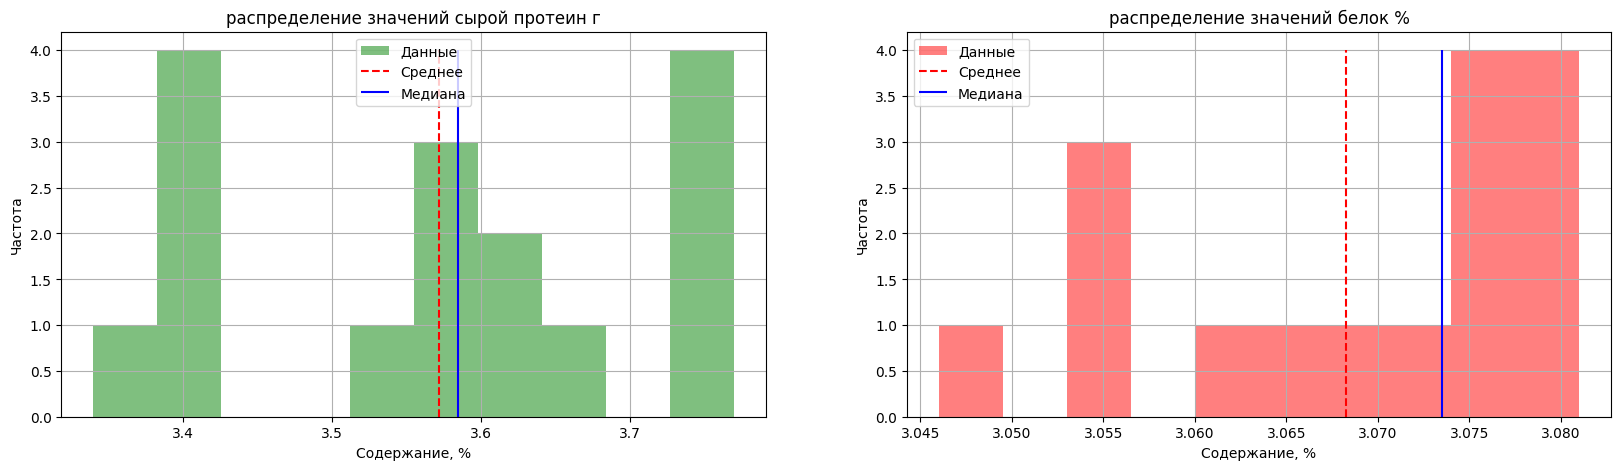

In [416]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))


data_cow['жирность %'].plot(kind='hist', ax=axes[0], color='green',alpha = 0.5)
axes[0].set_title('распределение значений сырой протеин г')
axes[0].set_ylabel('Частота')
axes[0].set_xlabel('Содержание, %')
axes[0].grid()

mean = data_cow['жирность %'].mean()
median = data_cow['жирность %'].median()
axes[0].vlines(mean, 0 , 4, colors ='red',linestyles='--',label ='Среднее' )
axes[0].vlines(median, 0 , 4, colors ='blue',label ='Медиана')
axes[0].legend(('Данные', 'Среднее','Медиана'))





data_cow['белок %'].plot(kind='hist', ax=axes[ 1], color='red',alpha = 0.5 )
axes[1].set_title('распределение значений белок %')
axes[1].set_ylabel('Частота')
axes[1].set_xlabel('Содержание, %')
axes[1].grid()

mean = data_cow['белок %'].mean()
median = data_cow['белок %'].median()
axes[1].vlines(mean, 0 , 4, colors ='red',linestyles='--',label ='Среднее' )
axes[1].vlines(median, 0 , 4, colors ='blue',label ='Медиана')
axes[1].legend(('Данные', 'Среднее','Медиана'))

plt.show()

Вывод.
Таблице data_cow  имеет категорийные данные и количесвенные, количесвенные распределны не равномерно. категорийные данные имеют практические равное соотношение по категорям за исключение соотношения возраста, породы папы быка и соотношения отцов.

In [417]:
data_main['тип пастбища'].unique(),   data_cow['тип пастбища'].unique()

(<StringArray>
 ['равнинное', 'холмистое']
 Length: 2, dtype: string,
 <StringArray>
 ['холмистое', 'равнинное']
 Length: 2, dtype: string)

## Корреляционный анализ

In [418]:
col = ['удой кг', 'эке (энергетическая кормовая единица)', 'сырой протеин г', 'спо (сахаро-протеиновое соотношение)',\
       'жирность %', 'белок %']

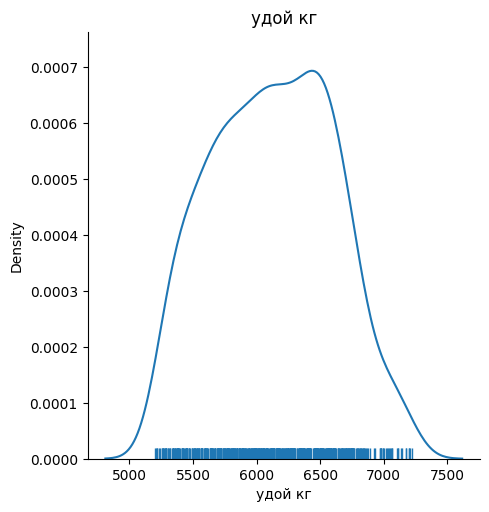

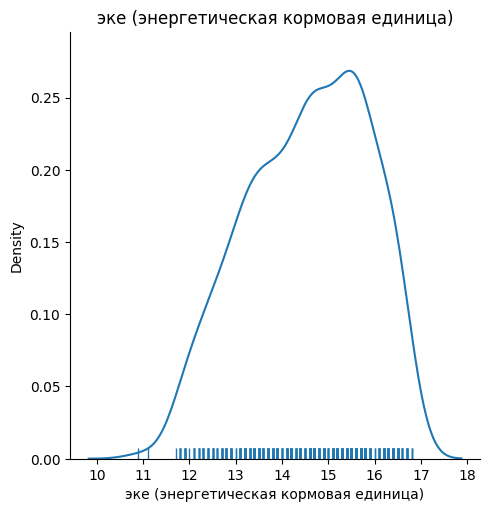

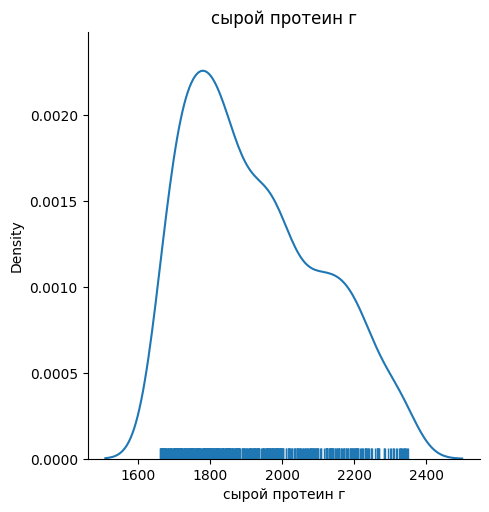

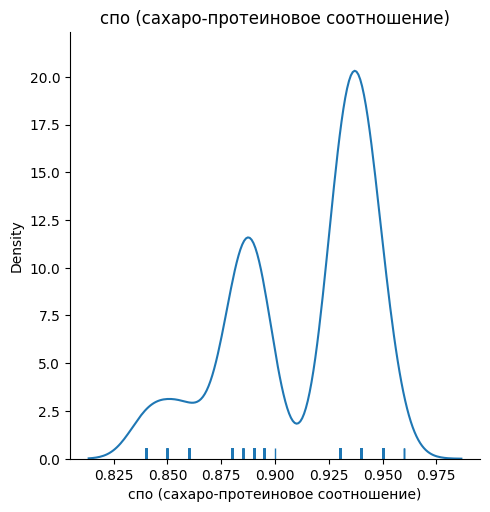

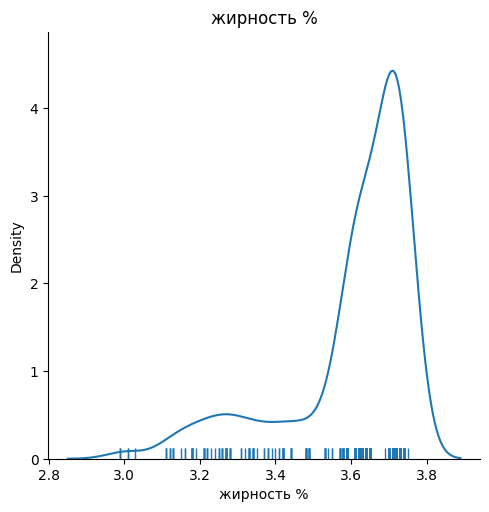

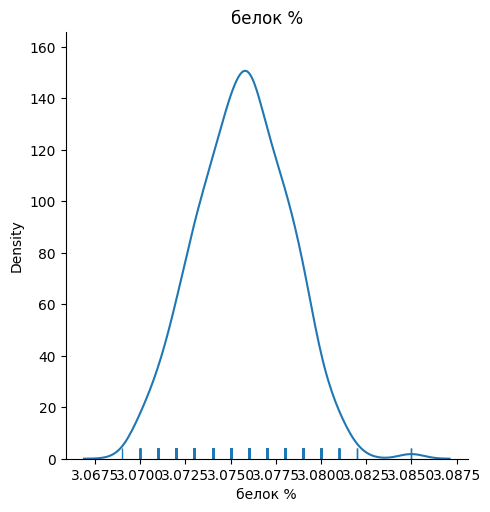

In [419]:
def plot_dist(df, col):
    sns.displot(df[col], kind="kde", rug=True)
    plt.title(col)
    plt.show()

# Отображение распределения для каждого столбца
for cl in col:
    plot_dist(data_main, cl)

In [420]:
cols = ['удой кг', 'эке (энергетическая кормовая единица)', 'сырой протеин г', 'белок %']

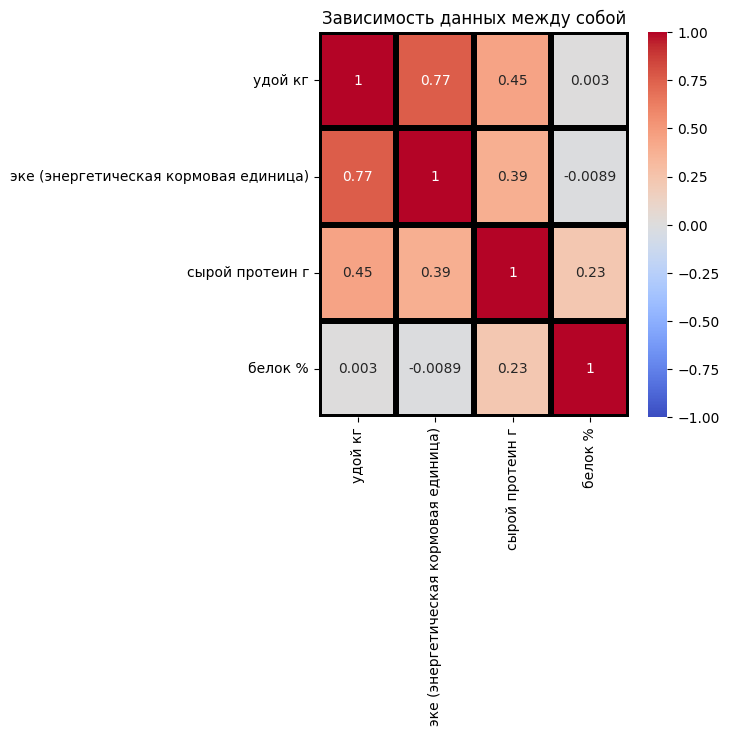

In [421]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data_main[cols].corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',linecolor='black' , linewidths=3)

plt.title('Зависимость данных между собой') #('bwr', 'seismic')

plt.show()

In [422]:
bad_col =['сырой протеин г', 'спо (сахаро-протеиновое соотношение)','жирность %']

Вывод на графике корреляции видим что больше всего зависимость данных есть между Удой кг  на ЭКЭ / СПО / жирность % , так же есть зависимость между ЭКЭ на СПО и на Жирность %

Расмотрим самые зависимые показатели ниже

In [423]:
def pearson_correlation(x, y):
  correlation, _ = pearsonr(x, y)
  return correlation

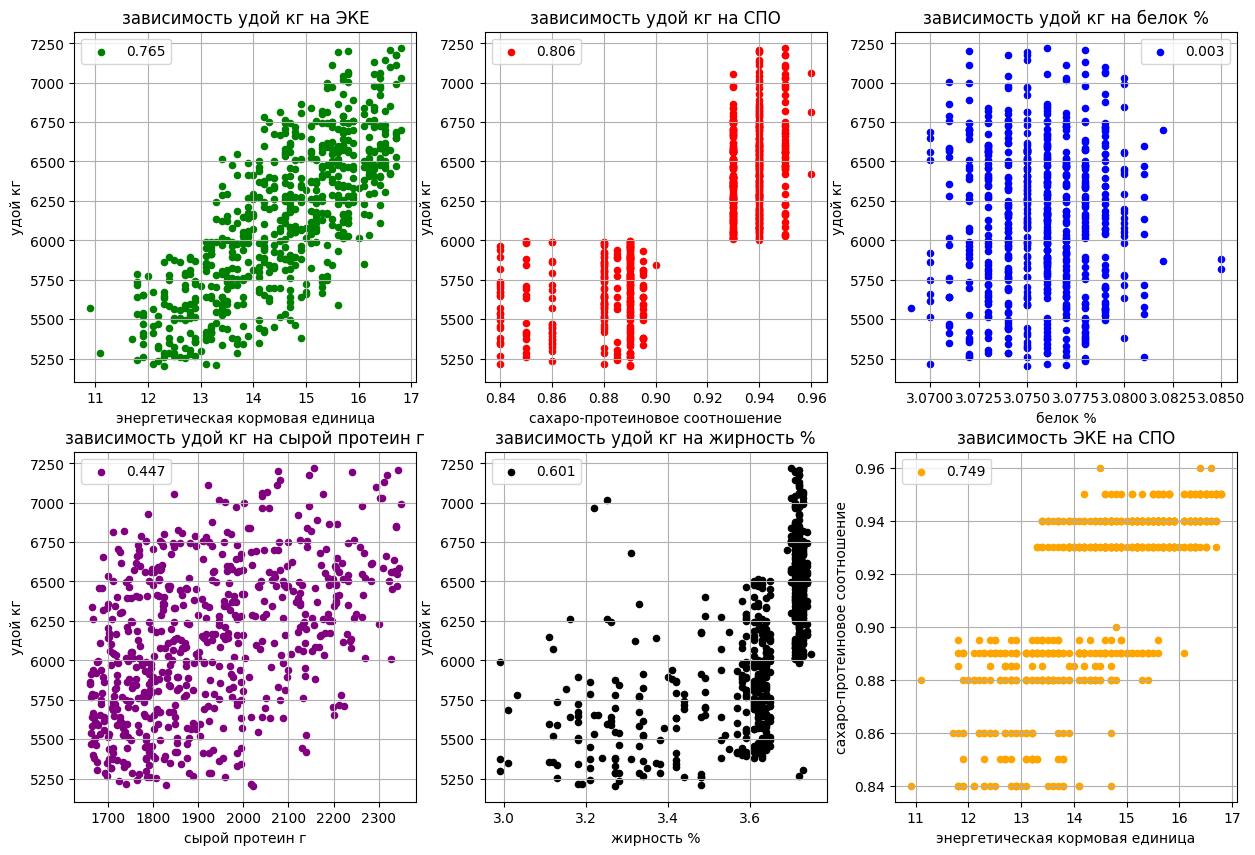

In [424]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

data_main.plot( kind = 'scatter',x='эке (энергетическая кормовая единица)', y='удой кг', color="green",  alpha=1, ax=axes[0, 0] )
axes[0, 0].set_title('зависимость удой кг на ЭКЕ')
axes[0, 0].set_ylabel('удой кг')
axes[0, 0].set_xlabel('энергетическая кормовая единица')
axes[0, 0].grid()
axes[0, 0].legend((round(pearson_correlation(data_main['эке (энергетическая кормовая единица)'], data_main['удой кг']),3),))


data_main.plot( kind = 'scatter',x='спо (сахаро-протеиновое соотношение)', y='удой кг', color="red",  alpha=1, ax=axes[0, 1] )
axes[0, 1].set_title('зависимость удой кг на СПО')
axes[0, 1].set_ylabel('удой кг')
axes[0, 1].set_xlabel('сахаро-протеиновое соотношение')
axes[0, 1].grid()
axes[0, 1].legend((round(pearson_correlation(data_main['спо (сахаро-протеиновое соотношение)'], data_main['удой кг']),3),))


data_main.plot( kind = 'scatter',x='белок %', y='удой кг', color="blue",  alpha=1, ax=axes[0, 2] )
axes[0, 2].set_title('зависимость удой кг на белок %')
axes[0, 2].set_ylabel('удой кг')
axes[0, 2].set_xlabel('белок %')
axes[0, 2].grid()
axes[0, 2].legend((round(pearson_correlation(data_main['белок %'], data_main['удой кг']),3),))

data_main.plot( kind = 'scatter',x='сырой протеин г', y='удой кг', color="purple",  alpha=1, ax=axes[1, 0] )
axes[1, 0].set_title('зависимость удой кг на сырой протеин г')
axes[1, 0].set_ylabel('удой кг')
axes[1, 0].set_xlabel('сырой протеин г')
axes[1, 0].grid()
axes[1, 0].legend((round(pearson_correlation(data_main['сырой протеин г'], data_main['удой кг']),3),))


data_main.plot( kind = 'scatter',x='жирность %', y='удой кг', color="black",  alpha=1, ax=axes[1, 1] )
axes[1, 1].set_title('зависимость удой кг на жирность %')
axes[1, 1].set_ylabel('удой кг')
axes[1, 1].set_xlabel('жирность %')
axes[1, 1].grid()
axes[1, 1].legend((round(pearson_correlation(data_main['жирность %'], data_main['удой кг']),3),))


data_main.plot( kind = 'scatter',x='эке (энергетическая кормовая единица)', y='спо (сахаро-протеиновое соотношение)', color="orange",  alpha=1, ax=axes[1,2])
axes[1, 2].set_title('зависимость ЭКЕ на СПО')
axes[1, 2].set_ylabel('сахаро-протеиновое соотношение')
axes[1, 2].set_xlabel('энергетическая кормовая единица')
axes[1, 2].grid()
axes[1, 2].legend((round(pearson_correlation(data_main['спо (сахаро-протеиновое соотношение)'], data_main['эке (энергетическая кормовая единица)']),3),))


plt.show()

Для того чтобы рассмотреть все зависимости параметров между Удой Кг на остальные количесвенные переменные отбирвем все строки без категорияальныых данных.

In [425]:
numeric_features = [col for col in data_main.columns if data_main[col].dtype != 'string'][1:]
numeric_features

['удой кг',
 'эке (энергетическая кормовая единица)',
 'сырой протеин г',
 'спо (сахаро-протеиновое соотношение)',
 'жирность %',
 'белок %']

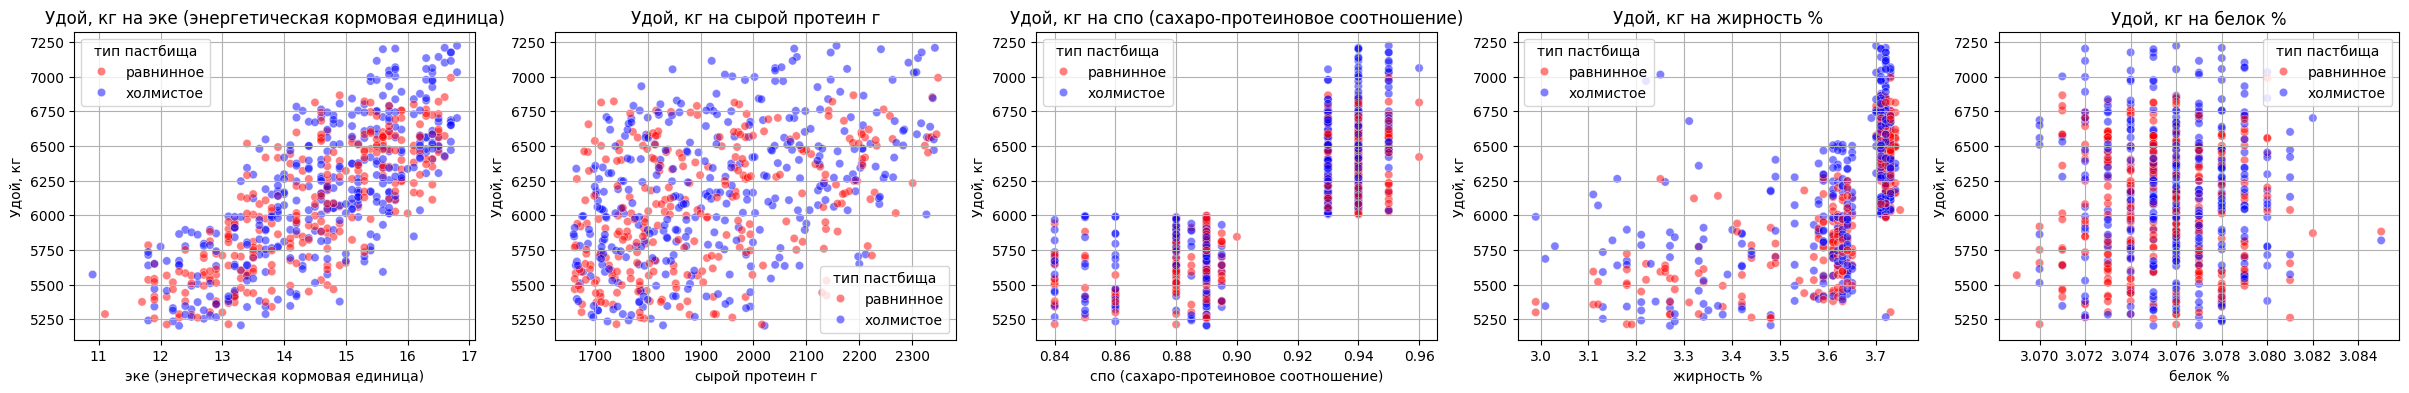



Коэф корреляции на типе пастбища "равнинные"  удой кг на  эке (энергетическая кормовая единица) = 0.789
Коэф корреляции на типе пастбища "холмистое"  удой кг на  эке (энергетическая кормовая единица) = 0.746




Коэф корреляции на типе пастбища "равнинные"  удой кг на  сырой протеин г = 0.411
Коэф корреляции на типе пастбища "холмистое"  удой кг на  сырой протеин г = 0.465




Коэф корреляции на типе пастбища "равнинные"  удой кг на  спо (сахаро-протеиновое соотношение) = 0.845
Коэф корреляции на типе пастбища "холмистое"  удой кг на  спо (сахаро-протеиновое соотношение) = 0.782




Коэф корреляции на типе пастбища "равнинные"  удой кг на  жирность % = 0.689
Коэф корреляции на типе пастбища "холмистое"  удой кг на  жирность % = 0.555




Коэф корреляции на типе пастбища "равнинные"  удой кг на  белок % = 0.014
Коэф корреляции на типе пастбища "холмистое"  удой кг на  белок % = -0.031




In [426]:
type_1 = data_main[data_main['тип пастбища'] == 'равнинное'][numeric_features]
type_2 = data_main[data_main['тип пастбища'] != 'равнинное'][numeric_features]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30,4))

palette = {'равнинное': 'red', 'холмистое': 'blue'}

for i, feature in enumerate(numeric_features):
    if feature == 'удой кг':
        continue

    ax = axes[i -1]
    sns.scatterplot(x=feature, y='удой кг',
                    data=data_main, hue='тип пастбища', palette=palette, ax=ax, alpha= 0.5)
    ax.set_title(f'Удой, кг на {feature}')

    ax.set_xlabel(feature)
    ax.set_ylabel('Удой, кг')
    ax.grid()
plt.show()


for i, feature in enumerate(numeric_features):
    if feature == 'удой кг':
      continue

    print('\n')
    print(f'Коэф корреляции на типе пастбища "равнинные"  удой кг на ', feature ,'=', round(pearson_correlation(type_1['удой кг'], type_1[feature] ),3) )
    print(f'Коэф корреляции на типе пастбища "холмистое"  удой кг на ', feature ,'=', round(pearson_correlation(type_2['удой кг'], type_2[feature]), 3) )
    print('\n')

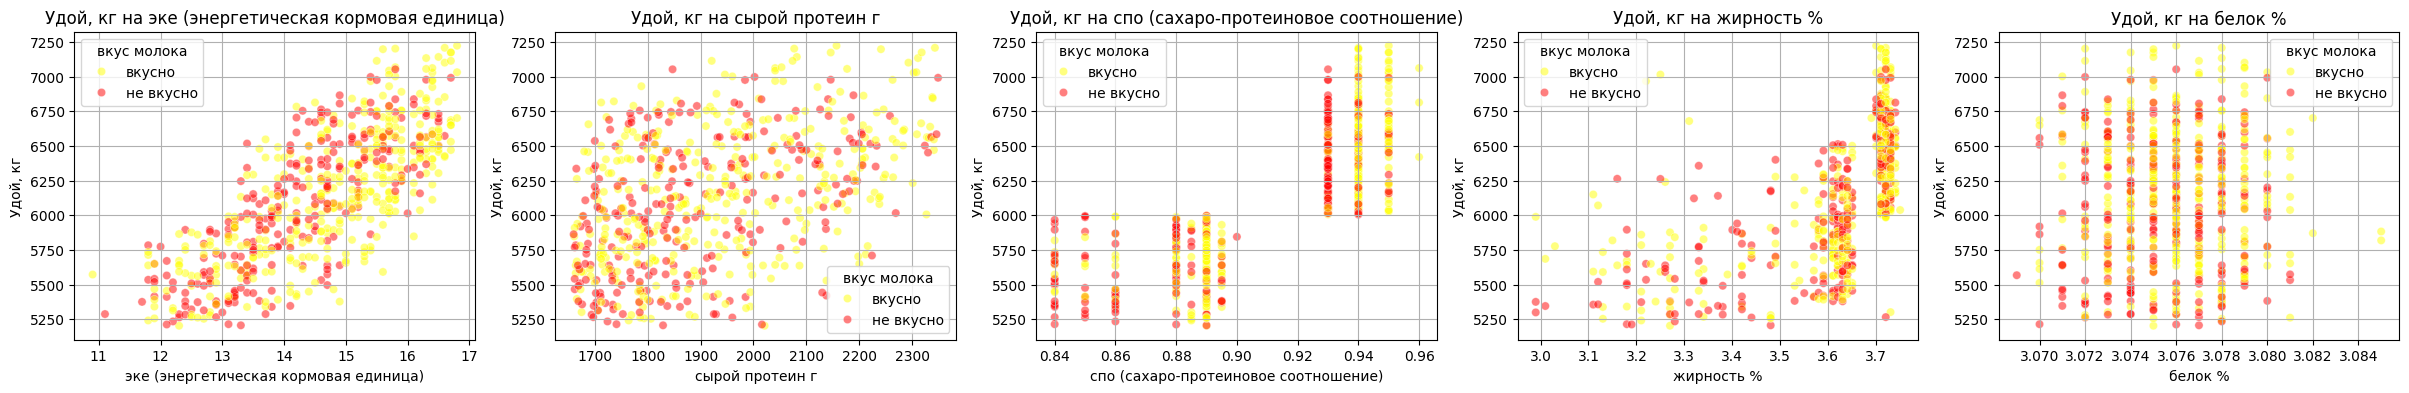



Коэф корреляции при "вкусном" молоке на удой кг на  эке (энергетическая кормовая единица) = 0.75
Коэф корреляции при "Не вкусном" молоке на удой кг на  эке (энергетическая кормовая единица) = 0.784




Коэф корреляции при "вкусном" молоке на удой кг на  сырой протеин г = 0.44
Коэф корреляции при "Не вкусном" молоке на удой кг на  сырой протеин г = 0.434




Коэф корреляции при "вкусном" молоке на удой кг на  спо (сахаро-протеиновое соотношение) = 0.8
Коэф корреляции при "Не вкусном" молоке на удой кг на  спо (сахаро-протеиновое соотношение) = 0.815




Коэф корреляции при "вкусном" молоке на удой кг на  жирность % = 0.558
Коэф корреляции при "Не вкусном" молоке на удой кг на  жирность % = 0.651




Коэф корреляции при "вкусном" молоке на удой кг на  белок % = -0.046
Коэф корреляции при "Не вкусном" молоке на удой кг на  белок % = 0.039




In [427]:
type_1 = data_main[data_main['вкус молока'] == 'вкусно'][numeric_features]
type_2 = data_main[data_main['вкус молока'] != 'вкусно'][numeric_features]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30,4))

palette = {'вкусно': 'yellow', 'не вкусно': 'red'}

for i, feature in enumerate(numeric_features):
    if feature == 'удой кг':
        continue
    ax = axes[i -1]
    sns.scatterplot(x=feature, y='удой кг',
                    data=data_main, hue='вкус молока',palette=palette, ax=ax, alpha= 0.5)
    ax.set_title(f'Удой, кг на {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Удой, кг')
    ax.grid()

plt.show()


for i, feature in enumerate(numeric_features):
    if feature == 'удой кг':
      continue

    print('\n')
    print(f'Коэф корреляции при "вкусном" молоке на удой кг на ', feature ,'=', round(pearson_correlation(type_1['удой кг'], type_1[feature]),3) )
    print(f'Коэф корреляции при "Не вкусном" молоке на удой кг на ', feature ,'=', round(pearson_correlation(type_2['удой кг'], type_2[feature]),3) )
    print('\n')

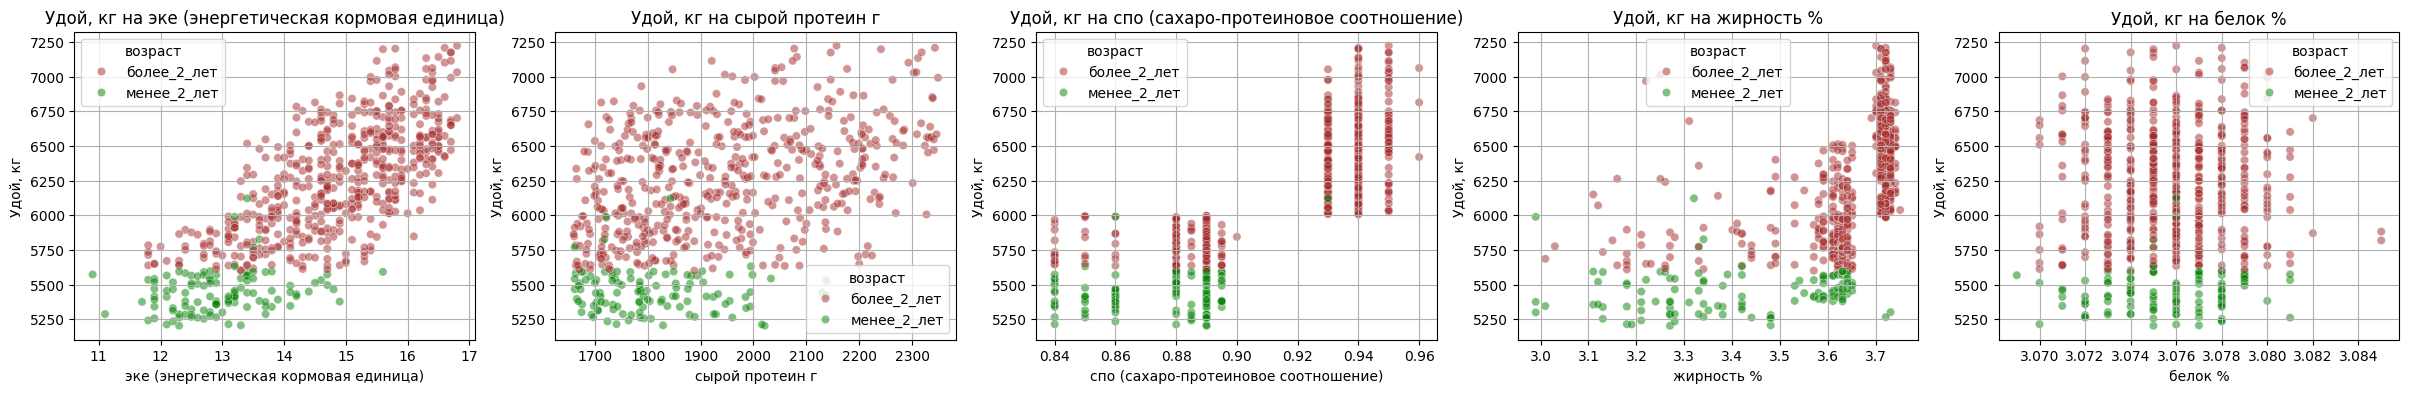



Коэф корреляции при возрасте "более_2_лет" на удой кг на  эке (энергетическая кормовая единица) = 0.223
Коэф корреляции при возрасте "менее_2_лет" на данных удой кг на  эке (энергетическая кормовая единица) = 0.784




Коэф корреляции при возрасте "более_2_лет" на удой кг на  сырой протеин г = -0.089
Коэф корреляции при возрасте "менее_2_лет" на данных удой кг на  сырой протеин г = 0.434




Коэф корреляции при возрасте "более_2_лет" на удой кг на  спо (сахаро-протеиновое соотношение) = 0.187
Коэф корреляции при возрасте "менее_2_лет" на данных удой кг на  спо (сахаро-протеиновое соотношение) = 0.815




Коэф корреляции при возрасте "более_2_лет" на удой кг на  жирность % = 0.098
Коэф корреляции при возрасте "менее_2_лет" на данных удой кг на  жирность % = 0.651




Коэф корреляции при возрасте "более_2_лет" на удой кг на  белок % = 0.105
Коэф корреляции при возрасте "менее_2_лет" на данных удой кг на  белок % = 0.039




In [428]:
type_1 = data_main[data_main['возраст'] == 'более_2_лет'][numeric_features]
type_1 = data_main[data_main['возраст'] != 'более_2_лет'][numeric_features]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30,4))

palette = {'более_2_лет': 'brown', 'менее_2_лет': 'green'}

for i, feature in enumerate(numeric_features):
    if feature == 'удой кг':
        continue
    ax = axes[i -1]
    sns.scatterplot(x=feature, y='удой кг',
                    data=data_main, hue='возраст',palette=palette, ax=ax, alpha= 0.5)
    ax.set_title(f'Удой, кг на {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Удой, кг')
    ax.grid()

plt.show()

for i, feature in enumerate(numeric_features):
    if feature == 'удой кг':
      continue

    print('\n')
    print(f'Коэф корреляции при возрасте "более_2_лет" на удой кг на ', feature ,'=', round(pearson_correlation(type_1['удой кг'], type_1[feature]),3) )
    print(f'Коэф корреляции при возрасте "менее_2_лет" на данных удой кг на ', feature ,'=', round(pearson_correlation(type_2['удой кг'], type_2[feature]),3) )
    print('\n')

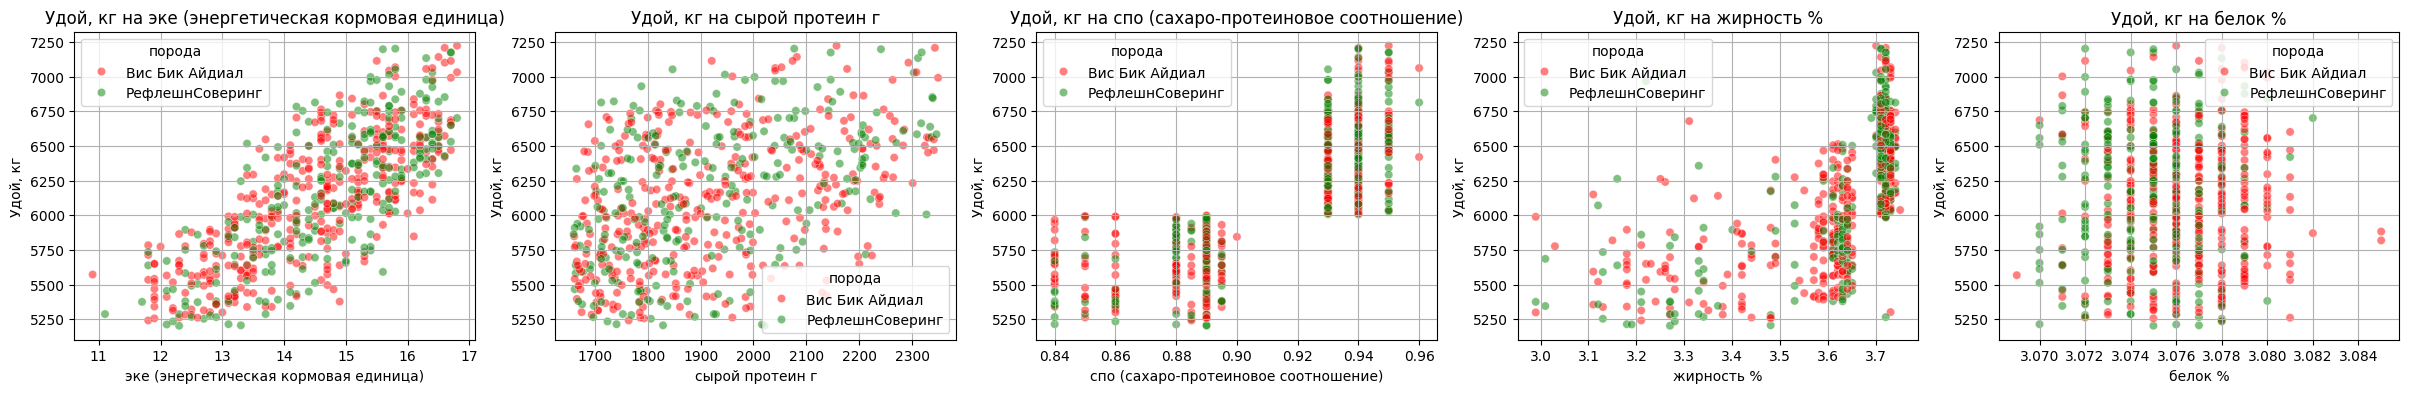



Коэф корреляции при породе "Вис Бик Айдиал" удой кг на  эке (энергетическая кормовая единица) = 0.769
Коэф корреляции при породе "РефлешнСоверинг" удой кг на  эке (энергетическая кормовая единица) = 0.76




Коэф корреляции при породе "Вис Бик Айдиал" удой кг на  сырой протеин г = 0.422
Коэф корреляции при породе "РефлешнСоверинг" удой кг на  сырой протеин г = 0.481




Коэф корреляции при породе "Вис Бик Айдиал" удой кг на  спо (сахаро-протеиновое соотношение) = 0.8
Коэф корреляции при породе "РефлешнСоверинг" удой кг на  спо (сахаро-протеиновое соотношение) = 0.817




Коэф корреляции при породе "Вис Бик Айдиал" удой кг на  жирность % = 0.613
Коэф корреляции при породе "РефлешнСоверинг" удой кг на  жирность % = 0.582




Коэф корреляции при породе "Вис Бик Айдиал" удой кг на  белок % = 0.019
Коэф корреляции при породе "РефлешнСоверинг" удой кг на  белок % = 0.029




In [429]:
type_1 = data_main[data_main['порода'] == 'Вис Бик Айдиал'][numeric_features]
type_2 = data_main[data_main['порода'] != 'Вис Бик Айдиал'][numeric_features]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30,4))

palette = {'Вис Бик Айдиал': 'red', 'РефлешнСоверинг': 'green'}

for i, feature in enumerate(numeric_features):
    if feature == 'удой кг':
        continue
    ax = axes[i -1]
    sns.scatterplot(x=feature, y='удой кг',
                    data=data_main, hue='порода',palette=palette, ax=ax, alpha= 0.5)
    ax.set_title(f'Удой, кг на {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Удой, кг')
    ax.grid()

plt.show()


for i, feature in enumerate(numeric_features):
    if feature == 'удой кг':
      continue

    print('\n')
    print(f'Коэф корреляции при породе "Вис Бик Айдиал" удой кг на ', feature ,'=', round(pearson_correlation(type_1['удой кг'], type_1[feature]) ,3))
    print(f'Коэф корреляции при породе "РефлешнСоверинг" удой кг на ', feature ,'=', round(pearson_correlation(type_2['удой кг'], type_2[feature]),3) )
    print('\n')

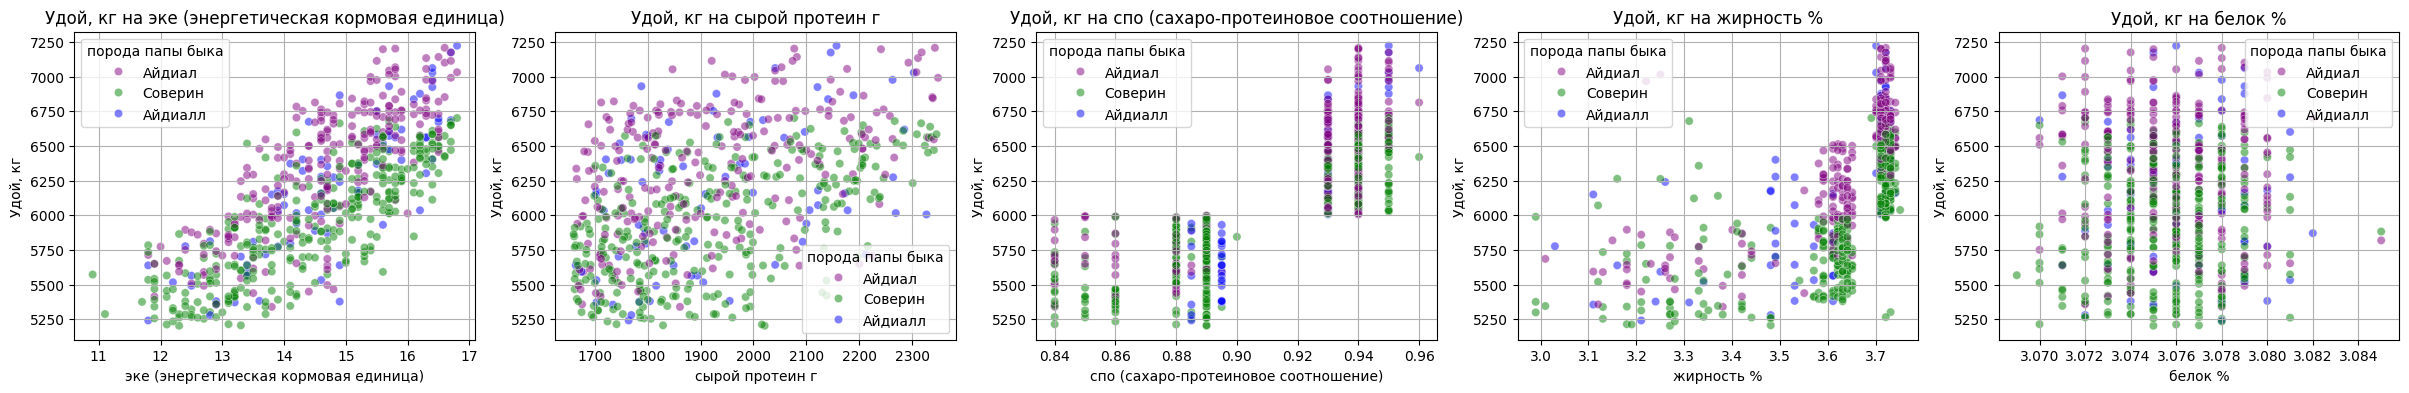



Коэф корреляции при породе папе быка "Айдиал" удой кг на  эке (энергетическая кормовая единица) = 0.784
Коэф корреляции при породе папе быка "Соверин" удой кг на  эке (энергетическая кормовая единица) = 0.818
Коэф корреляции при породе папе быка "Соверин" удой кг на  эке (энергетическая кормовая единица) = 0.828




Коэф корреляции при породе папе быка "Айдиал" удой кг на  сырой протеин г = 0.451
Коэф корреляции при породе папе быка "Соверин" удой кг на  сырой протеин г = 0.551
Коэф корреляции при породе папе быка "Соверин" удой кг на  сырой протеин г = 0.391




Коэф корреляции при породе папе быка "Айдиал" удой кг на  спо (сахаро-протеиновое соотношение) = 0.785
Коэф корреляции при породе папе быка "Соверин" удой кг на  спо (сахаро-протеиновое соотношение) = 0.844
Коэф корреляции при породе папе быка "Соверин" удой кг на  спо (сахаро-протеиновое соотношение) = 0.889




Коэф корреляции при породе папе быка "Айдиал" удой кг на  жирность % = 0.715
Коэф корреляции при породе папе быка

In [430]:
type_1 = data_main[data_main['порода папы быка'] == 'Айдиал'][numeric_features]
type_2 = data_main[data_main['порода папы быка'] == 'Соверин'][numeric_features]
type_3 = data_main[data_main['порода папы быка'] == 'Айдиалл'][numeric_features]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30,4))

palette = {'Айдиал': 'purple', 'Соверин': 'green', 'Айдиалл': 'blue'}

for i, feature in enumerate(numeric_features):
    if feature == 'удой кг':
        continue
    ax = axes[i-1]
    sns.scatterplot(x=feature, y='удой кг',
                    data=data_main, hue='порода папы быка',palette=palette, ax=ax, alpha= 0.5)
    ax.set_title(f"Удой, кг на {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel('Удой, кг')
    ax.grid()

plt.show()


for i, feature in enumerate(numeric_features):
    if feature == 'удой кг':
      continue

    print('\n')
    print(f'Коэф корреляции при породе папе быка "Айдиал" удой кг на ', feature ,'=', round(pearson_correlation(type_1['удой кг'], type_1[feature]),3) )
    print(f'Коэф корреляции при породе папе быка "Соверин" удой кг на ', feature ,'=', round(pearson_correlation(type_2['удой кг'], type_2[feature]),3) )
    print(f'Коэф корреляции при породе папе быка "Соверин" удой кг на ', feature ,'=', round(pearson_correlation(type_3['удой кг'], type_3[feature]),3) )
    print('\n')

Вывод:
  - был произведен корреляционны анализ признаков, коэфициент расчитывался Пирсона. Самая большая зависимость наблюдается у Удой КГ на ЭКЕ/ СПО/Жирность %, так жесть зависимость ЭКЕ на СПО и СПО на Жирность %.
  Так же у всех данных немного разница коэф корреляции в зависмости от категорияальныз данных. Коэфициенты представлены под каждым графиком.

Например:
  - Коэф корреляции при возрасте "более_2_лет" на удой кг на  эке (энергетическая кормовая единица) = 0.196
Коэф корреляции при возрасте "менее_2_лет" на данных удой кг на  эке (энергетическая кормовая единица) = 0.772

Зависимости:
  - на графике корреляции Удоя Кг на ЭКЕ наблюдается около линейная зависимость.
  - на графике корреляции Удоя Кг на Сырой протеин не наблюдается отчетливая линейная зависимость. но она так же есть.
  - на графике корреляции Удоя Кг на СПО отсутствует линейная зависимость. данные расположены как буд-то это категорияальные данные.
  - на графике корреляции Удоя Кг на Жирность % не линейная зависимость.
  - на графике корреляции Удоя Кг на Белок % не линейная зависимость


Целевой и входной признаки бывают качественными, либо количественными. Качественные признаки - это признаки, которые не могут быть измерены числом. Количественные признаки - это признаки, которые могут быть измерены числом.

Мультиколлинеарность:
  - Слишком большая зависимость может создать погрешнось. т.к. не понимания какой признак влияет больше или меньше. мультиколлинеарность может наблюдаться при коэф корреляции 0,8+
в наших данных есть такие данные например :

    - Коэф корреляции при породе "Вис Бик Айдиал" удой кг на  спо (сахаро-протеиновое соотношение) = 0.806
   Коэф корреляции при породе "РефлешнСоверинг" удой кг на  спо (сахаро-протеиновое соотношение) = 0.806
    - или
    - Коэф корреляции при породе папе быка "Айдиал" удой кг на  эке (энергетическая кормовая единица) = 0.785
    - Коэф корреляции при породе папе быка "Соверин" удой кг на  эке (энергетическая кормовая единица) = 0.805
    - Коэф корреляции при породе папе быка "Соверин" удой кг на  эке (энергетическая кормовая единица) = 0.835
    - или
    - Коэф корреляции при "вкусном" молоке на удой кг на  спо (сахаро-протеиновое соотношение) = 0.805
    - Коэф корреляции при "Не вкусном" молоке на удой кг на  спо (сахаро-протеиновое соотношение) = 0.807

## Обучение модели линейной регрессии

###  1 задача

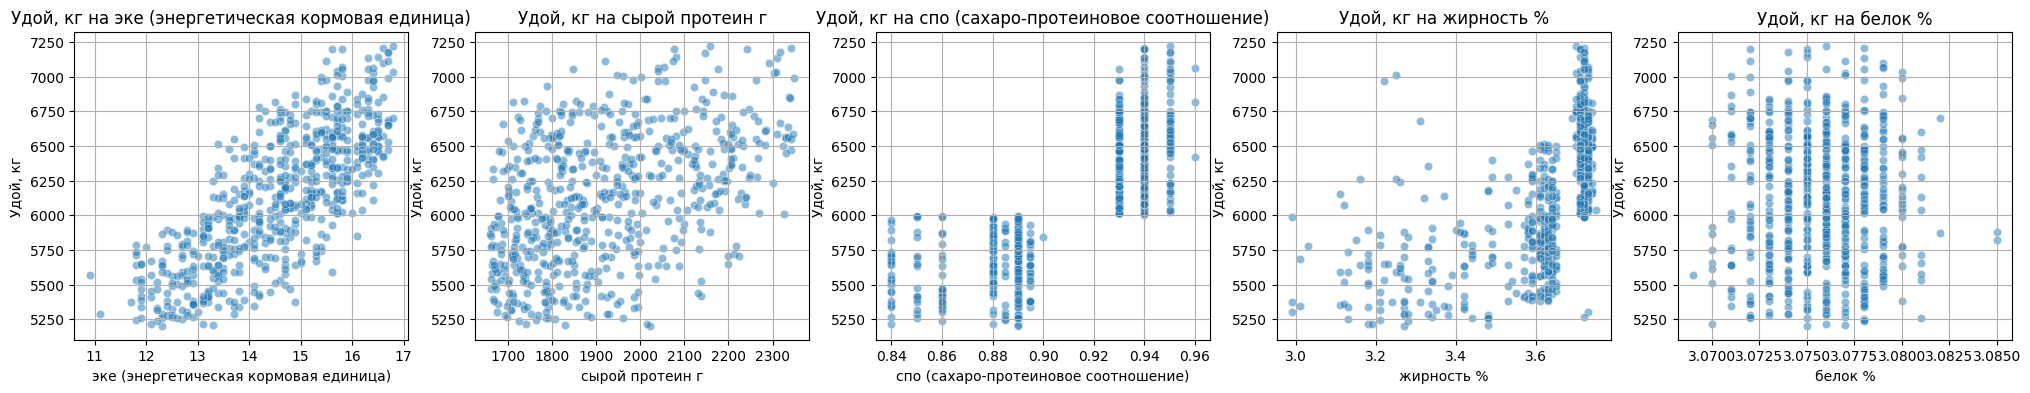

In [431]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25,4))


for i, feature in enumerate(numeric_features):
    if feature == 'удой кг':
        continue
    ax = axes[i -1]
    sns.scatterplot(x=feature, y='удой кг',
                    data=data_main,  ax=ax, alpha= 0.5)
    ax.set_title(f'Удой, кг на {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Удой, кг')
    ax.grid()

plt.show()

In [432]:
df1 = data_main.copy()

RANDOM_STATE = 42


X = df1.drop('удой кг', axis=1)
y = df1['удой кг']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)



cat_col_names = ['порода', 'тип пастбища', 'порода папы быка' ,'возраст']  #

num_col_names =['эке (энергетическая кормовая единица)', 'сырой протеин г','спо (сахаро-протеиновое соотношение)' ]


# StandardScaler fit + transform +DataFrame
#Экземляр
scaler01 = StandardScaler()

# обучили
X_train_scaled = scaler01.fit_transform(X_train[num_col_names])

#прогнали на трасформе
X_test_scaled01 = scaler01.transform(X_test[num_col_names])

# вернули обратно в DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled01 = pd.DataFrame(X_test_scaled01, columns=num_col_names)


#OneHotEncoder +fit_transform +  transform +  DataFrame
encoder01 = OneHotEncoder( handle_unknown='ignore'  , sparse=False)  #

# обучили
X_train_ohe = encoder01.fit_transform(X_train[cat_col_names])

#прогнали на трасформе
X_test_ohe01 = encoder01.transform(X_test[cat_col_names])

# получили имена get_feature_names_out список новых столбцов и сохраните в новой переменной
encoder_col_names01 = encoder01.get_feature_names_out()    #get_feature_names()get_feature_names_out

# вернули обратно в DataFrame
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names01)
X_test_ohe01 = pd.DataFrame(X_test_ohe01, columns=encoder_col_names01)


# соеденили все части в едеиное
X_train = pd.concat([X_train_scaled,X_train_ohe], axis=1)
X_test = pd.concat([X_test_scaled01,X_test_ohe01], axis=1)


#Экземляр
model_lr01  = LinearRegression()
# обучение
model_lr01.fit(X_train, y_train)
# предсказание модели
predictions01 = model_lr01.predict(X_test)



# расчет и вывовд метрики R2
r2 = r2_score(y_test, predictions01)
print("R2 LinearRegression =", r2)

print(model_lr01.coef_)




R2 LinearRegression = 0.8051209522302396
[ 1.63269390e+02  5.24075991e+01  1.60581318e+02 -1.21954488e-01
  1.21954488e-01 -2.93201601e+01  2.93201601e+01  1.38215394e+02
 -1.06836911e+00 -1.37147025e+02  1.08216174e+02 -1.08216174e+02]


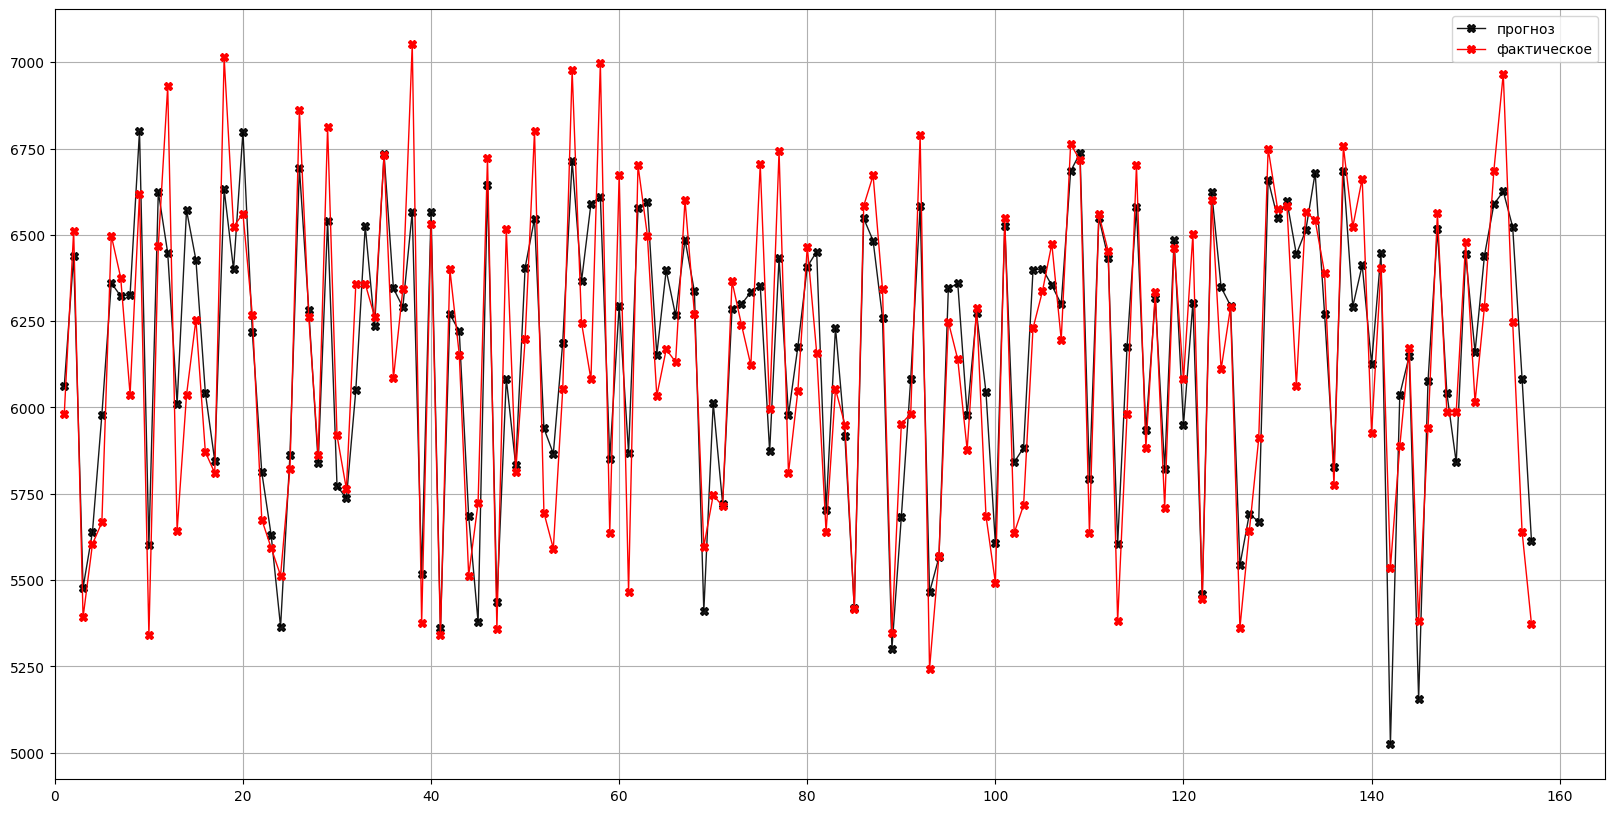

In [433]:
fig, ax = plt.subplots(figsize=(20, 10))
x = [i for i in range(1, len(predictions01) + 1)]
plt.plot(x, predictions01, color="black", linewidth=1, marker="X", linestyle="-", alpha=0.9)
plt.plot(x, y_test, color="Red", linewidth=1, marker="X", linestyle="-", alpha=1)

plt.legend (('прогноз', 'фактическое'))

plt.xlim(0)
plt.grid()
plt.show()

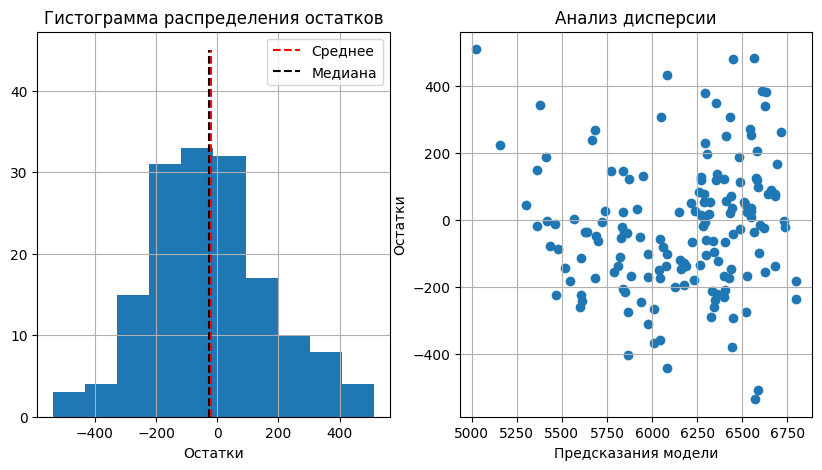

In [434]:
residuals = y_test - predictions01
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[0].grid()
axes[0].vlines(residuals.mean(), 0 , 45, colors ='red',linestyles='--',label ='Среднее' )
axes[0].vlines(residuals.median(), 0 , 45, colors ='black',linestyles='--',label ='Среднее' )
axes[0].legend(('Среднее', 'Медиана'))


axes[1].scatter(predictions01, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
axes[1].grid()



plt.show()

Вывод:
R2 LinearRegression = 0.8051209522302396
что довольно таки близко к 1, то есть в целом модель неплохо работает.
в остатках данные распределены нормально, среднее медиана около 0.


### 2 задача

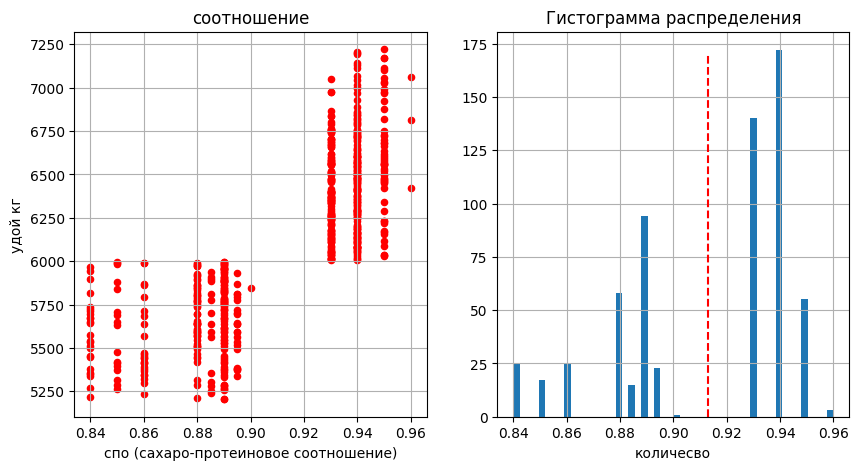

In [435]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
data_main.plot( kind = 'scatter',x='спо (сахаро-протеиновое соотношение)', y='удой кг', color="red",  alpha=1 ,ax=axes[0] )
axes[0].set_title('соотношение')
axes[0].grid()



mean= data_main['спо (сахаро-протеиновое соотношение)'].mean()
axes[1].hist(data_main['спо (сахаро-протеиновое соотношение)'],bins= 50)
axes[1].set_title('Гистограмма распределения')
axes[1].set_xlabel('количесво')
axes[1].grid()
axes[1].vlines(x=mean, ymin=0, ymax=170, color='red', linestyle='--', label='Среднее')



plt.show()

для перевода в бинарный виаринт столбца СПО передаем егов  метод OneHotEncoder, а с масштабирования убираем.

Для получения линейной зависимости возведем в квадрат стобец ЭКЕ

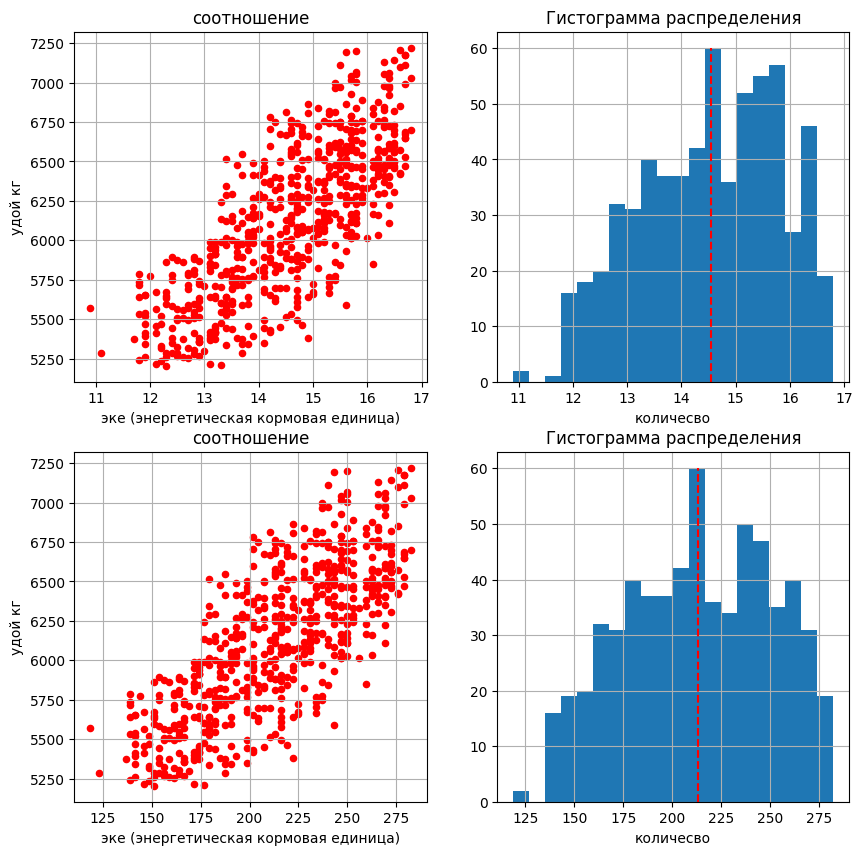

In [436]:
df2 = data_main.copy()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
df2.plot( kind = 'scatter',x='эке (энергетическая кормовая единица)', y='удой кг', color="red",  alpha=1 ,ax=axes[0, 0] )
axes[0, 0].set_title('соотношение')
axes[0, 0].grid()



mean= df2['эке (энергетическая кормовая единица)'].mean()
axes[0, 1].hist(df2['эке (энергетическая кормовая единица)'],bins= 20)
axes[0, 1].set_title('Гистограмма распределения')
axes[0, 1].set_xlabel('количесво')
axes[0, 1].grid()
axes[0, 1].vlines(x=mean, ymin=0, ymax=60, color='red', linestyle='--', label='Среднее')





df2['эке (энергетическая кормовая единица)'] = pow(df2['эке (энергетическая кормовая единица)'], 2)


df2.plot( kind = 'scatter',x='эке (энергетическая кормовая единица)', y='удой кг', color="red",  alpha=1 ,ax=axes[1, 0] )
axes[1, 0].set_title('соотношение')
axes[1, 0].grid()



mean= df2['эке (энергетическая кормовая единица)'].mean()
axes[1, 1].hist(df2['эке (энергетическая кормовая единица)'],bins= 20)
axes[1, 1].set_title('Гистограмма распределения')
axes[1, 1].set_xlabel('количесво')
axes[1, 1].grid()
axes[1, 1].vlines(x=mean, ymin=0, ymax=60, color='red', linestyle='--', label='Среднее')



plt.show()

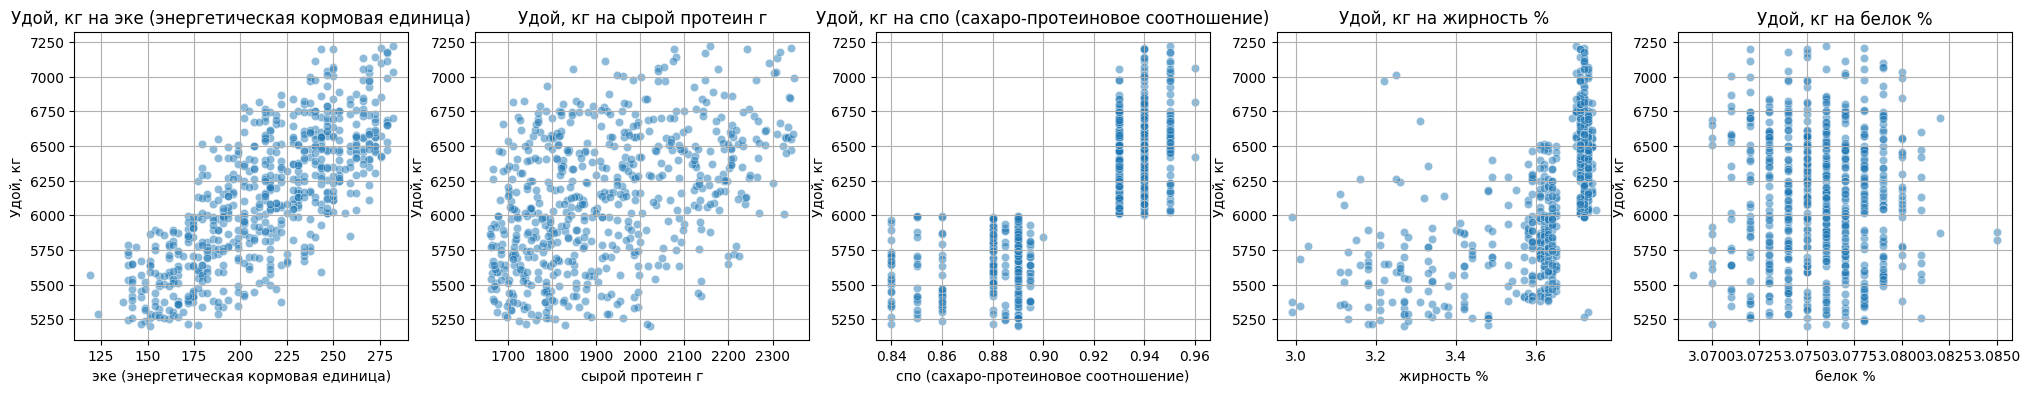

In [437]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25,4))


for i, feature in enumerate(numeric_features):
    if feature == 'удой кг':
        continue
    ax = axes[i -1]
    sns.scatterplot(x=feature, y='удой кг',
                    data=df2,  ax=ax, alpha= 0.5)
    ax.set_title(f'Удой, кг на {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Удой, кг')
    ax.grid()

plt.show()

In [438]:
df2.loc[df2['спо (сахаро-протеиновое соотношение)'] > 0.91, 'СПО'] = 1
df2.loc[df2['спо (сахаро-протеиновое соотношение)'] <+ 0.91, 'СПО'] = 0
df2 =  df2.drop(columns ='спо (сахаро-протеиновое соотношение)', axis=1)
df2.head(5)

id  удой кг  эке (энергетическая кормовая единица)  сырой протеин г  \
0   1     5863                                 201.64             1743   
1   2     5529                                 163.84             2138   
2   3     5810                                 196.00             1854   
3   4     5895                                 153.76             2012   
4   5     5302                                 163.84             1675   

            порода тип пастбища порода папы быка  жирность %  белок %  \
0   Вис Бик Айдиал    равнинное           Айдиал        3.58    3.076   
1   Вис Бик Айдиал    равнинное          Соверин        3.54    3.079   
2  РефлешнСоверинг    холмистое          Соверин        3.59    3.074   
3  РефлешнСоверинг    холмистое           Айдиал        3.40    3.075   
4   Вис Бик Айдиал    равнинное          Соверин        3.73    3.073   

  вкус молока      возраст  СПО  
0      вкусно  более_2_лет  0.0  
1      вкусно  менее_2_лет  0.0  
2   не вкусно  более_2_лет  0.0  
3   не вкусно  более_2_лет  0.0  
4      вкусно  менее_2_лет  0.0

In [439]:
RANDOM_STATE = 42


X = df2.drop('удой кг', axis=1)
y = df2['удой кг']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)


cat_col_names = ['порода папы быка', 'возраст',  'порода', 'тип пастбища', 'СПО']
num_col_names = ['эке (энергетическая кормовая единица)', 'сырой протеин г']



#Экземляр
scaler02 = StandardScaler()
# обучил
X_train_scaled = scaler02.fit_transform(X_train[num_col_names])
#прогнали на трасформе
X_test_scaled02 = scaler02.transform(X_test[num_col_names])

# вернули обратно в DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled02 = pd.DataFrame(X_test_scaled02, columns=num_col_names)


#OneHotEncoder +fit_transform +  transform +  DataFrame
encoder02 = OneHotEncoder(handle_unknown='ignore'  , sparse=False)

# обучили
X_train_ohe = encoder02.fit_transform(X_train[cat_col_names])

#прогнали на трасформе
X_test_ohe02 = encoder02.transform(X_test[cat_col_names])

# получили имена get_feature_names_out список новых столбцов и сохраните в новой переменной
encoder_col_names02= encoder02.get_feature_names_out()    #get_feature_names_out()get_feature_names

# вернули обратно в DataFrame
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names02)
X_test_ohe02 = pd.DataFrame(X_test_ohe02, columns=encoder_col_names02)


# соеденили все части в едеиное
X_train = pd.concat([X_train_scaled,X_train_ohe], axis=1)
X_test = pd.concat([X_test_scaled02,X_test_ohe02], axis=1)


# обучение модели и получение предсказаний на тестовых данных
model_lr02 = LinearRegression()
model_lr02.fit(X_train, y_train)
predictions02 = model_lr02.predict(X_test)


r2 = r2_score(y_test, predictions02)
print("R2 LinearRegression =", r2)

print(model_lr02.coef_)



R2 LinearRegression = 0.8299509436008191
[ 161.15478999   51.02051695  119.86188357    2.6506567  -122.51254027
  104.29824734 -104.29824734   -2.67514006    2.67514006  -19.62616588
   19.62616588 -183.95018524  183.95018524]


эке (энергетическая кормовая единица)  сырой протеин г  \
0                                -0.527089        -0.813322   
1                                 1.490346         0.026730   
2                                -0.527089        -0.682405   
3                                -0.961737        -1.058792   
4                                 0.561660        -1.413360   
..                                     ...              ...   
152                               1.754809         0.506760   
153                               0.643423         0.714046   
154                               0.561660         0.114008   
155                               0.239936        -0.415116   
156                              -1.032313        -1.211529   

     порода папы быка_Айдиал  порода папы быка_Айдиалл  \
0                        1.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   
..                       ...                       ...   
152                      0.0                       1.0   
153                      1.0                       0.0   
154                      1.0                       0.0   
155                      0.0                       1.0   
156                      0.0                       1.0   

     порода папы быка_Соверин  возраст_более_2_лет  возраст_менее_2_лет  \
0                         0.0                  1.0                  0.0   
1                         1.0                  1.0                  0.0   
2                         1.0                  0.0                  1.0   
3                         1.0                  1.0                  0.0   
4                         1.0                  1.0                  0.0   
..                        ...                  ...                  ...   
152                       0.0                  1.0                  0.0   
153                       0.0                  1.0                  0.0   
154                       0.0                  1.0                  0.0   
155                       0.0                  1.0                  0.0   
156                       0.0                  0.0                  1.0   

     порода_Вис Бик Айдиал  порода_РефлешнСоверинг  тип пастбища_равнинное  \
0                      1.0                     0.0                     0.0   
1                      0.0                     1.0                     0.0   
2                      0.0                     1.0                     0.0   
3                      1.0                     0.0                     1.0   
4                      1.0                     0.0                     0.0   
..                     ...                     ...                     ...   
152                    1.0                     0.0                     0.0   
153                    0.0                     1.0                     0.0   
154                    1.0                     0.0                     1.0   
155                    1.0                     0.0                     1.0   
156                    1.0                     0.0                     1.0   

     тип пастбища_холмистое  СПО_0.0  СПО_1.0  
0                       1.0      1.0      0.0  
1                       1.0      0.0      1.0  
2                       1.0      1.0      0.0  
3                       0.0      1.0      0.0  
4                       1.0      1.0      0.0  
..                      ...      ...      ...  
152                     1.0      0.0      1.0  
153                     1.0      0.0      1.0  
154                     0.0      0.0      1.0  
155                     0.0      1.0      0.0  
156                     0.0      1.0      0.0  

[157 rows x 13 columns]

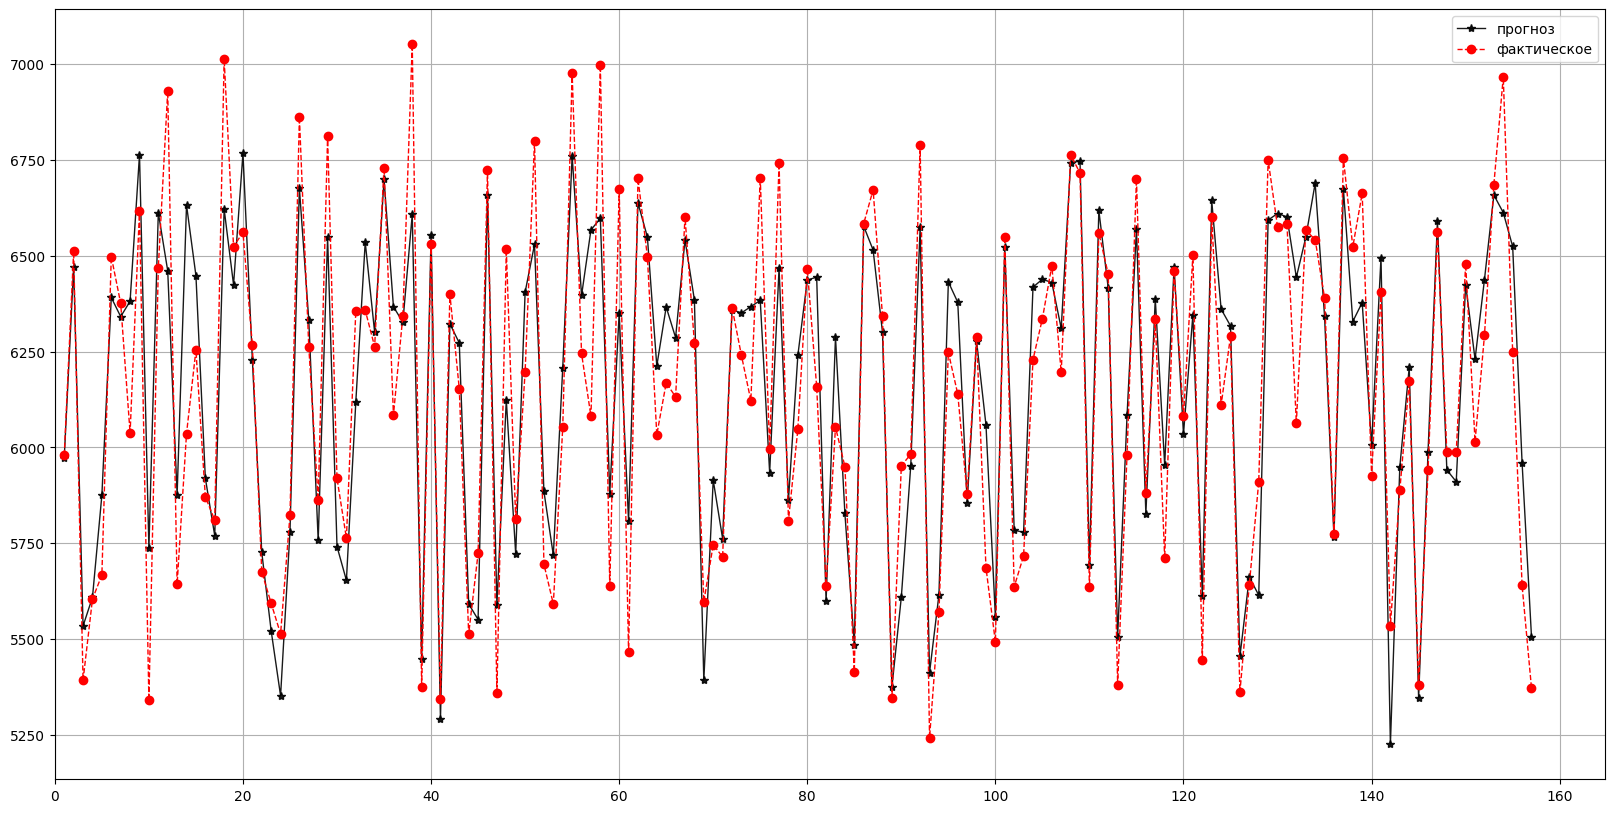

In [440]:
fig, ax = plt.subplots(figsize=(20, 10))
x = [i for i in range(1, len(predictions02) + 1)]
plt.plot(x, predictions02, color="black", linewidth=1, marker="*", linestyle="-", alpha=0.9)
plt.plot(x, y_test, color="Red", linewidth=1, marker="o", linestyle="--", alpha=1)

plt.legend (('прогноз', 'фактическое'))

plt.xlim(0)
plt.grid()
plt.show()

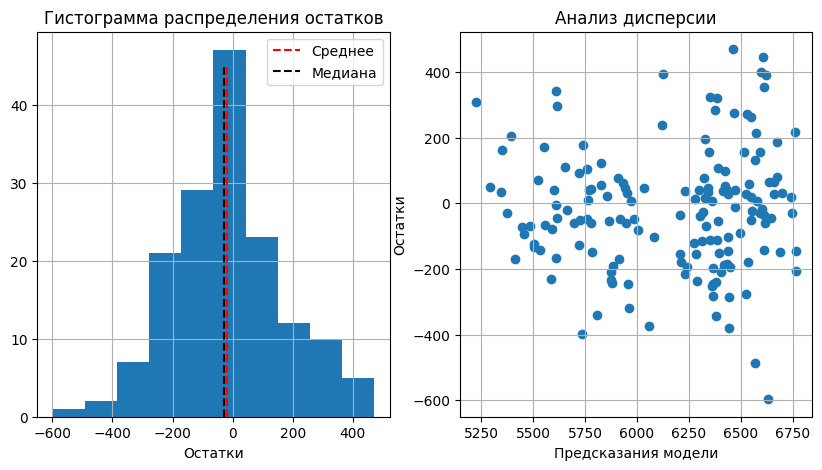

In [441]:
residuals = y_test - predictions02
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[0].grid()
axes[0].vlines(residuals.mean(), 0 , 45, colors ='red',linestyles='--',label ='Среднее' )
axes[0].vlines(residuals.median(), 0 , 45, colors ='black',linestyles='--',label ='Среднее' )
axes[0].legend(('Среднее', 'Медиана'))


axes[1].scatter(predictions02, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
axes[1].grid()
plt.show()

Вывод:
R2 LinearRegression = 0.8299509436008192 что  лучше чем у прошлых модели. в остатках данные распределены нормально, среднее медиана около 0. Модель имеет около постоянный разброс дисперсии, но так же не равномерный

### 3 задача

In [442]:
df3 = df2.merge(data_dad ,  on = 'id', how = 'left' )
df3

id  удой кг  эке (энергетическая кормовая единица)  сырой протеин г  \
0      1     5863                                 201.64             1743   
1      2     5529                                 163.84             2138   
2      3     5810                                 196.00             1854   
3      4     5895                                 153.76             2012   
4      5     5302                                 163.84             1675   
..   ...      ...                                    ...              ...   
623  625     6812                                 237.16             1964   
624  626     5513                                 166.41             1700   
625  627     5970                                 207.36             1837   
626  628     5746                                 190.44             1994   
627  629     6503                                 262.44             2283   

              порода тип пастбища порода папы быка  жирность %  белок %  \
0     Вис Бик Айдиал    равнинное           Айдиал        3.58    3.076   
1     Вис Бик Айдиал    равнинное          Соверин        3.54    3.079   
2    РефлешнСоверинг    холмистое          Соверин        3.59    3.074   
3    РефлешнСоверинг    холмистое           Айдиал        3.40    3.075   
4     Вис Бик Айдиал    равнинное          Соверин        3.73    3.073   
..               ...          ...              ...         ...      ...   
623  РефлешнСоверинг    равнинное           Айдиал        3.74    3.075   
624  РефлешнСоверинг    равнинное          Соверин        3.64    3.073   
625  РефлешнСоверинг    холмистое          Соверин        3.64    3.075   
626  РефлешнСоверинг    равнинное          Соверин        3.64    3.077   
627   Вис Бик Айдиал    холмистое          Соверин        3.71    3.076   

    вкус молока      возраст  СПО  имя папы  
0        вкусно  более_2_лет  0.0    Буйный  
1        вкусно  менее_2_лет  0.0  Соловчик  
2     не вкусно  более_2_лет  0.0     Барин  
3     не вкусно  более_2_лет  0.0    Буйный  
4        вкусно  менее_2_лет  0.0     Барин  
..          ...          ...  ...       ...  
623   не вкусно  более_2_лет  1.0    Буйный  
624      вкусно  менее_2_лет  0.0     Барин  
625   не вкусно  более_2_лет  0.0     Барин  
626      вкусно  более_2_лет  0.0     Барин  
627      вкусно  более_2_лет  1.0  Соловчик  

[628 rows x 13 columns]

In [443]:
RANDOM_STATE = 42

X = df3.drop('удой кг', axis=1)
y = df3['удой кг']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

cat_col_names = ['порода папы быка', 'возраст',  'порода', 'тип пастбища', 'СПО', 'имя папы']


num_col_names = ['эке (энергетическая кормовая единица)', 'сырой протеин г']

scaler03 = StandardScaler()
X_train_scaled = scaler03.fit_transform(X_train[num_col_names])
X_test_scaled03 = scaler03.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled03 = pd.DataFrame(X_test_scaled03, columns=num_col_names)

encoder03 = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_ohe = encoder03.fit_transform(X_train[cat_col_names])
X_test_ohe03 = encoder03.transform(X_test[cat_col_names])

encoder_col_names03 = encoder03.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names03)
X_test_ohe03 = pd.DataFrame(X_test_ohe03, columns=encoder_col_names03)

X_train = pd.concat([X_train_scaled,X_train_ohe], axis=1)
X_test = pd.concat([X_test_scaled03,X_test_ohe03], axis=1)

model_lr03 = LinearRegression()
model_lr03.fit(X_train, y_train)

predictions03 = model_lr03.predict(X_test)

r2 = r2_score(y_test, predictions03)
print("R2 LinearRegression =", r2)

print(model_lr03.coef_)


R2 LinearRegression = 0.8215922348003692
[ 161.08059636   51.82186169  -42.25997138   -0.71962812   42.9795995
   97.2170707   -97.2170707    -7.57260748    7.57260748  -25.08695503
   25.08695503 -177.09138459  177.09138459 -182.95262063  155.09975557
  185.99821289 -158.14534784]


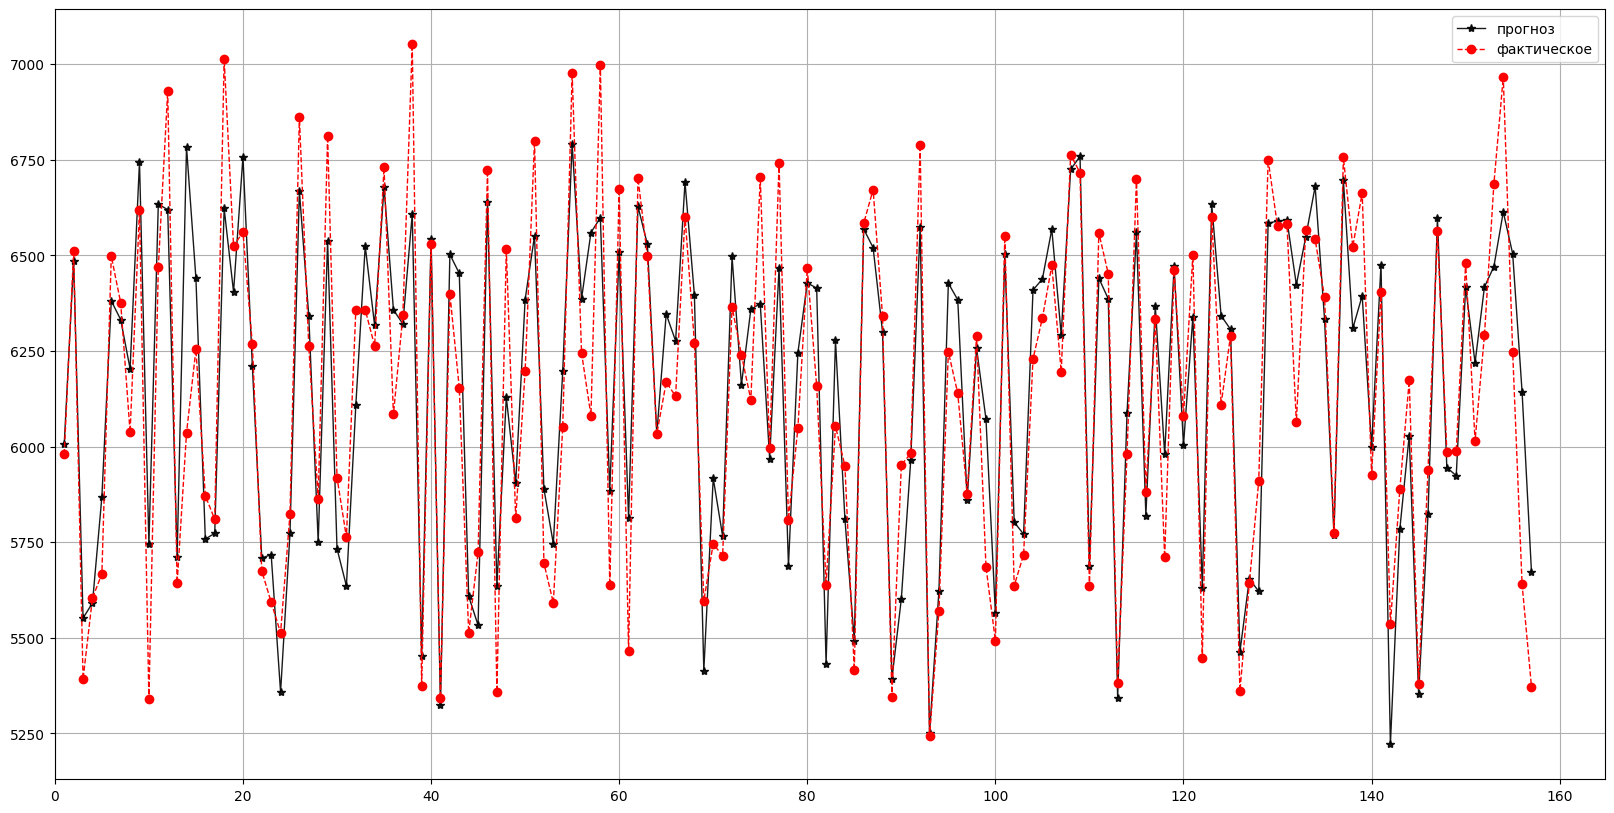

In [444]:
fig, ax = plt.subplots(figsize=(20, 10))
x = [i for i in range(1, len(predictions03) + 1)]
plt.plot(x, predictions03, color="black", linewidth=1, marker="*", linestyle="-", alpha=0.9)
plt.plot(x, y_test, color="Red", linewidth=1, marker="o", linestyle="--", alpha=1)

plt.legend (('прогноз', 'фактическое'))

plt.xlim(0)
plt.grid()
plt.show()

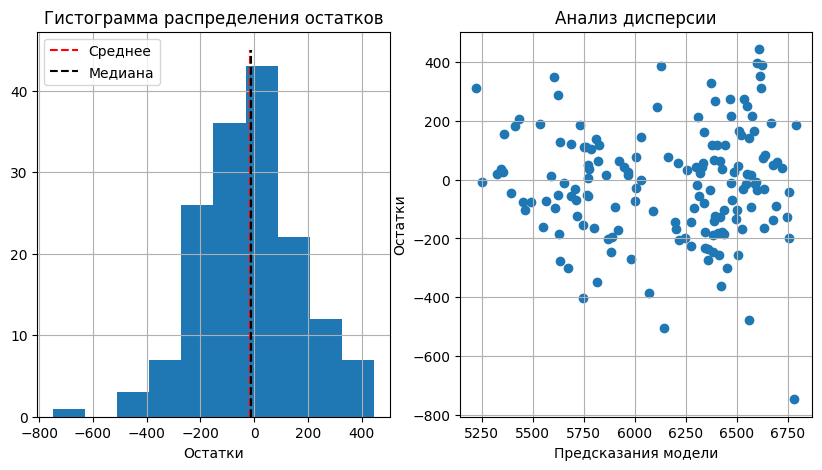

In [445]:
residuals = y_test - predictions03
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[0].grid()
axes[0].vlines(residuals.mean(), 0 , 45, colors ='red',linestyles='--',label ='Среднее' )
axes[0].vlines(residuals.median(), 0 , 45, colors ='black',linestyles='--',label ='Среднее' )
axes[0].legend(('Среднее', 'Медиана'))


axes[1].scatter(predictions03, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
axes[1].grid()
plt.show()



Вывод:
R2 LinearRegression = 0.8215922348003692.
в остатках данные распределены не нормально, среднее медиана около 0.
Дисперсия не имеет постояннство, значит модель скорее всего не будет корректно работать.

### 4 задача

Вывод показатели R^2  лучние у второй модели, после переведения столбца в бинарную класификацию. и возведения другого стобца в квадрат.
показатели следующие:

R2 LinearRegression = 0.8051209522302396

R2 LinearRegression = 0.8299509436008192

R2 LinearRegression = 0.8215922348003692



у каждой модели разное распределние остатоков, у первых двух моделей более "равноменое распределение остатков" по стравлению с третьей у которой есть провал

### 5 задача.
Оценим качество каждой моделей по трём метрикам

In [446]:
mse = mean_squared_error(y_test, predictions01)
print(f'средний квадрат ошибки = ' , round(mse,3) ,'кг^2')

rmse = mean_squared_error(y_test, predictions01, squared=False)
print(f'модель ошибается Удое на = ',round(rmse,3) ,'кг')

mae = mean_absolute_error(y_test, predictions01)
print(f'в среднем модель отклоняется от целевого значения на  ', round(mae,3) ,'кг')

средний квадрат ошибки =  39670.546 кг^2
модель ошибается Удое на =  199.175 кг
в среднем модель отклоняется от целевого значения на   156.608 кг


In [447]:
mse = mean_squared_error(y_test, predictions02)
print(f'средний квадрат ошибки = ' , round(mse,3) ,'кг^2')

rmse = mean_squared_error(y_test, predictions02, squared=False)
print(f'модель ошибается в Удое на = ',round(rmse,3) ,'кг')

mae = mean_absolute_error(y_test, predictions02)
print(f'в среднем модель отклоняется от целевого значения на  ', round(mae,3) ,'кг')

средний квадрат ошибки =  34616.03 кг^2
модель ошибается в Удое на =  186.054 кг
в среднем модель отклоняется от целевого значения на   143.269 кг


In [448]:
mse = mean_squared_error(y_test, predictions03)
print(f'средний квадрат ошибки = ' , round(mse,3) ,'кг^2')

rmse = mean_squared_error(y_test, predictions03, squared=False)
print(f'модель ошибается в Удое на = ',round(rmse,3) ,'кг')

mae = mean_absolute_error(y_test, predictions03)
print(f'в среднем модель отклоняется от целевого значения на  ', round(mae,3) ,'кг')

средний квадрат ошибки =  36317.57 кг^2
модель ошибается в Удое на =  190.572 кг
в среднем модель отклоняется от целевого значения на   147.581 кг


расчитаем доверительный интервал для лучшей модели.

In [449]:
quantile_25 = np.quantile(predictions02, 0.25)
quantile_75 = np.quantile(predictions02, 0.75)

print(f"Доверительный интервал")
print(f"Нижняя граница: {quantile_25:.3f}")
print(f"Верхняя граница: {quantile_75:.3f}")

Доверительный интервал
Нижняя граница: 5807.162
Верхняя граница: 6471.670


Вывод: лучшая модель третья, т.к у нее лкчший коэф детерминации по сравнение с первыми двумя.

### 6 задача

Увеличивем средние значения в столбце ЭКЕ на 5%

In [450]:
X_data_cow = data_cow.copy()

eke = round(data_main['эке (энергетическая кормовая единица)'].mean()* 1.05 ,2) #
protein = round(data_main['сырой протеин г'].mean()* 1.05 ,2)
spo = round(data_main['спо (сахаро-протеиновое соотношение)'].mean()* 1.05 ,2)

# Добавьте новые признаки в data_cow
X_data_cow['эке (энергетическая кормовая единица)'] = eke
X_data_cow['сырой протеин г'] = protein
X_data_cow['спо (сахаро-протеиновое соотношение)'] = spo

X_data_cow
X_data_cow.loc[X_data_cow['спо (сахаро-протеиновое соотношение)'] > 0.91, 'СПО'] = 1
X_data_cow.loc[X_data_cow['спо (сахаро-протеиновое соотношение)'] <= 0.91, 'СПО'] = 0
X_data_cow =  X_data_cow.drop(columns ='спо (сахаро-протеиновое соотношение)', axis=1)
X_data_cow['эке (энергетическая кормовая единица)'] = pow(X_data_cow['эке (энергетическая кормовая единица)'], 2)
X_data_cow.head()

порода тип пастбища порода папы быка  имя папы  жирность %  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес        3.58   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный        3.54   
2  РефлешнСоверинг    равнинное          Соверин     Барин        3.59   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный        3.40   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный        3.64   

   белок %      возраст  эке (энергетическая кормовая единица)  \
0    3.076  более_2_лет                               233.4784   
1    3.081  менее_2_лет                               233.4784   
2    3.074  более_2_лет                               233.4784   
3    3.061  более_2_лет                               233.4784   
4    3.074  более_2_лет                               233.4784   

   сырой протеин г  СПО  
0          2019.95  1.0  
1          2019.95  1.0  
2          2019.95  1.0  
3          2019.95  1.0  
4          2019.95  1.0

In [451]:
cat_col_names = ['порода папы быка', 'возраст',  'порода', 'тип пастбища', 'СПО']

num_col_names = ['эке (энергетическая кормовая единица)', 'сырой протеин г']




X_test_scaled02 = scaler02.transform(X_data_cow[num_col_names])
X_test_scaled02 = pd.DataFrame(X_test_scaled02, columns=num_col_names)


X_test_ohe02 = encoder02.transform(X_data_cow[cat_col_names])
X_test_ohe02 = pd.DataFrame(X_test_ohe02, columns=encoder_col_names02)


X_data_cow_t = pd.concat([X_test_scaled02,X_test_ohe02], axis=1)


predictions02 = model_lr02.predict(X_data_cow_t)
predictions02


array([6581.44100238, 6091.21775209, 6305.1645269 , 6586.7912825 ,
       6547.53895075, 6096.56803222, 6299.81424677, 6378.19478782,
       6339.06657853, 6305.1645269 , 6581.44100238, 6130.47008384,
       6586.7912825 , 6339.06657853, 6096.56803222, 6299.81424677])

Вывод, используя лучшую модель из трех ранне созданных предсказали ответы для новых данных.

## Обучение модели логистической регрессии

Задача классификации

### 1 задача

In [452]:
df4 = data_main.copy()


In [453]:
df4.loc[df4['вкус молока'] == 'вкусно', 'вкус молока 1_0'] = 1
df4.loc[df4['вкус молока'] != 'вкусно', 'вкус молока 1_0'] = 0
df4 =  df4.drop(columns ='вкус молока', axis=1)
df4

id  удой кг  эке (энергетическая кормовая единица)  сырой протеин г  \
0      1     5863                                   14.2             1743   
1      2     5529                                   12.8             2138   
2      3     5810                                   14.0             1854   
3      4     5895                                   12.4             2012   
4      5     5302                                   12.8             1675   
..   ...      ...                                    ...              ...   
624  625     6812                                   15.4             1964   
625  626     5513                                   12.9             1700   
626  627     5970                                   14.4             1837   
627  628     5746                                   13.8             1994   
628  629     6503                                   16.2             2283   

     спо (сахаро-протеиновое соотношение)           порода тип пастбища  \
0                                   0.890   Вис Бик Айдиал    равнинное   
1                                   0.890   Вис Бик Айдиал    равнинное   
2                                   0.885  РефлешнСоверинг    холмистое   
3                                   0.885  РефлешнСоверинг    холмистое   
4                                   0.885   Вис Бик Айдиал    равнинное   
..                                    ...              ...          ...   
624                                 0.940  РефлешнСоверинг    равнинное   
625                                 0.880  РефлешнСоверинг    равнинное   
626                                 0.880  РефлешнСоверинг    холмистое   
627                                 0.890  РефлешнСоверинг    равнинное   
628                                 0.940   Вис Бик Айдиал    холмистое   

    порода папы быка  жирность %  белок %      возраст  вкус молока 1_0  
0             Айдиал        3.58    3.076  более_2_лет              1.0  
1            Соверин        3.54    3.079  менее_2_лет              1.0  
2            Соверин        3.59    3.074  более_2_лет              0.0  
3             Айдиал        3.40    3.075  более_2_лет              0.0  
4            Соверин        3.73    3.073  менее_2_лет              1.0  
..               ...         ...      ...          ...              ...  
624           Айдиал        3.74    3.075  более_2_лет              0.0  
625          Соверин        3.64    3.073  менее_2_лет              1.0  
626          Соверин        3.64    3.075  более_2_лет              0.0  
627          Соверин        3.64    3.077  более_2_лет              1.0  
628          Соверин        3.71    3.076  более_2_лет              1.0  

[628 rows x 12 columns]

In [454]:
RANDOM_STATE = 42

# загружаем данные


# разделяем признаки на входные и целевой
X = df4.drop('вкус молока 1_0', axis=1)
y = df4['вкус молока 1_0']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)


#

cat_col_names = [ 'тип пастбища', 'возраст']
num_col_names =[ 'жирность %', 'белок %', 'сырой протеин г']


# StandardScaler fit + transform +DataFrame
#Экземляр
scaler4 = StandardScaler()

# обучили
X_train_scaled = scaler4.fit_transform(X_train[num_col_names])

#прогнали на трасформе
X_test_scaled4 = scaler4.transform(X_test[num_col_names])

# вернули обратно в DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled4 = pd.DataFrame(X_test_scaled4, columns=num_col_names)


#OneHotEncoder +fit_transform +  transform +  DataFrame
encoder4 = OneHotEncoder(handle_unknown='ignore' , sparse=False)  #handle_unknown='ignore' drop='first',

# обучили
X_train_ohe = encoder4.fit_transform(X_train[cat_col_names])

#прогнали на трасформе
X_test_ohe4 = encoder4.transform(X_test[cat_col_names])

# получили имена get_feature_names_out список новых столбцов и сохраните в новой переменной
encoder_col_names4 = encoder4.get_feature_names_out()    #get_feature_names_out()

# вернули обратно в DataFrame
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names4)
X_test_ohe4 = pd.DataFrame(X_test_ohe4, columns=encoder_col_names4)



X_train = pd.concat([X_train_ohe, X_train_scaled ], axis=1)
X_test = pd.concat([X_test_ohe4, X_test_scaled4], axis=1)



clf = LogisticRegression(random_state=42)  # OneVsRestClassifier

clf.fit(X_train, y_train)

y_pred4 = clf.predict(X_test)

print('то что предсказали', y_pred4[:5])  # то что предсказали
print('куда хотели попасть\n', y_test.iloc[:5]) # куда хотели попасть

# оцениваем accuracy
acc = accuracy_score(y_test, y_pred4)
print('accuracy ',round(acc,2))

# оцениваем accuracy
recall = recall_score(y_test, y_pred4)
print('recall: ',round(recall ,3))

# оцениваем accuracy
precision = precision_score(y_test, y_pred4)
print('precision: ',round(precision,3))


то что предсказали [1. 1. 1. 0. 1.]
куда хотели попасть
 582    1.0
592    1.0
551    1.0
214    0.0
486    1.0
Name: вкус молока 1_0, dtype: float64
accuracy  0.57
recall:  0.83
precision:  0.579


In [455]:
print('Соотношение классов')
y_train.value_counts()

Соотношение классов


вкус молока 1_0
1.0    282
0.0    189
Name: count, dtype: int64

Вывод: доля правильных ответов по (accuracy)  составляет  0.66, но т.к классы не сбалансированы, то не берем в учет эту метрику.

доля правильных предсказаний составляет 0.886(первый столбец) (recal)

алгорим ставит категорию 1, с вероятностью 0.642(первая строка) (precision)


In [456]:


y = df4['вкус молока 1_0']

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(df4.drop('вкус молока 1_0', axis=1), y)
y_pred = dummy_clf.predict(df4.drop("вкус молока 1_0", axis=1))


accuracy = accuracy_score(y, y_pred)
print(f"Метрика наивной модели (точность): {accuracy:.4f}")

Метрика наивной модели (точность): 0.5892


### 2 задача




Ошибка первого рода: Оценка коровы как подходящей для производства вкусного молока, хотя на самом деле это не так. Ошибка первого рода приводит к покупке коров, которые на самом деле не будут производить вкусное молоко. Это может привести к пустой трате денег, разочарованию и снижению прибыли. В крайних случаях невкусное молоко может даже повредить репутации производителя.

Ошибка второго рода: Оценка коровы как неподходящей для производства вкусного молока, хотя на самом деле это так.Ошибка второго рода означает, что подходящие коровы не будут куплены. Хотя это может привести к потере потенциальных прибылей, это менее критично, поскольку заказчик все равно получит некоторое количество вкусного молока от правильно идентифицированных коров. Более того, неподходящие коровы можно использовать для других целей, таких как производство говядины.

Вывведем коэфициенты которые влияли на результат

In [457]:
clf = LogisticRegression(random_state=RANDOM_STATE)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

for feature_number, feature_name in enumerate(X_train.columns):
    weight = clf.coef_[0, feature_number]
    print(f"{feature_name:<20}: {weight:+.6f}")

тип пастбища_равнинное: -0.292184
тип пастбища_холмистое: +0.292181
возраст_более_2_лет : +0.210959
возраст_менее_2_лет : -0.210962
жирность %          : +0.103519
белок %             : +0.232047
сырой протеин г     : +0.155797


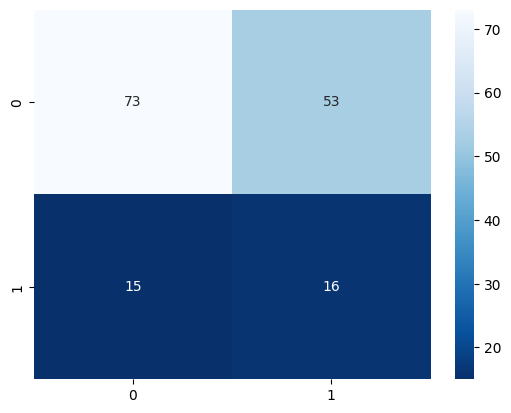

In [458]:

scaler = StandardScaler()
X_train_scalled = scaler.fit_transform(X_train)
X_test_scalled = scaler.transform(X_test)

clf = LogisticRegression()
clf = clf.fit(X_train_scalled, y_train)
y_pred = clf.predict(X_test_scalled)

# постройте матрицу ошибок и сохраните её в переменную
cm = confusion_matrix(y_test, y_pred)
z =  cm[0,0]
cm[0,0] = cm[1,1]
cm[1,1] = z


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');


Вывод: на графике confusion_matrix мы видим что 74  раза мы правильно предсказали показатель (TP). 28 раза мы предсказали "вкусное" и ошиблись  должно быть "не вкусное" (FP). 14 раз мы предсказали  "не вкусное" хотя должно быть "вкусное" (FN), 41  верно предсказали, ждали "не вкусное" и получили "не вкусное" (TN).


In [459]:
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

print(data.head())

     y_valid   y_proba
66       1.0  0.793958
138      1.0  0.763226
56       1.0  0.751762
149      1.0  0.750115
7        1.0  0.747944


In [460]:
columns = []
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 4,endpoint=False)]

for i in thresholds:
	columns.append('y_pred_'+str(i))
	data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)

# выведем 5 случайных строк
print(data.sample(5))

     y_valid   y_proba  y_pred_0.1  y_pred_0.32  y_pred_0.55  y_pred_0.78
107      1.0  0.633414           1            1            1            0
125      1.0  0.633203           1            1            1            0
140      1.0  0.646270           1            1            1            0
98       1.0  0.489408           1            1            0            0
4        1.0  0.615211           1            1            1            0


In [461]:

y_valid = np.array(data['y_valid'])
y_proba = np.array(data['y_proba'])
thresholds = np.array([0.1, 0.32, 0.55, 0.78])
y_pred_thresholds = []

for threshold in thresholds:
    y_pred = np.where(y_proba >= threshold, 1, 0)
    y_pred_thresholds.append(y_pred)


precision_scores = []
for y_pred in y_pred_thresholds:
    precision = precision_score(y_valid, y_pred)
    precision_scores.append(precision)


optimal_threshold_index = np.argmax(precision_scores)

print("порог:", thresholds[optimal_threshold_index])

порог: 0.78


In [462]:
clf.predict_proba(X_test)

array([[0.3602004 , 0.6397996 ],
       [0.38260921, 0.61739079],
       [0.39678036, 0.60321964],
       [0.48740644, 0.51259356],
       [0.38478863, 0.61521137],
       [0.3914087 , 0.6085913 ],
       [0.318222  , 0.681778  ],
       [0.25205561, 0.74794439],
       [0.272194  , 0.727806  ],
       [0.44943178, 0.55056822],
       [0.35174381, 0.64825619],
       [0.28859376, 0.71140624],
       [0.30548143, 0.69451857],
       [0.33441775, 0.66558225],
       [0.29187353, 0.70812647],
       [0.30672876, 0.69327124],
       [0.39393895, 0.60606105],
       [0.36111303, 0.63888697],
       [0.32799882, 0.67200118],
       [0.35415461, 0.64584539],
       [0.28146189, 0.71853811],
       [0.40824696, 0.59175304],
       [0.57502504, 0.42497496],
       [0.55554546, 0.44445454],
       [0.43695513, 0.56304487],
       [0.27238978, 0.72761022],
       [0.48331408, 0.51668592],
       [0.38885873, 0.61114127],
       [0.39887616, 0.60112384],
       [0.58688463, 0.41311537],
       [0.

### 3 задача

спрогнозируйте вкус молока коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.

In [463]:
X_data_cow = data_cow.copy()

eke = round(data_main['эке (энергетическая кормовая единица)'].mean()* 1.05 ,2) #
protein = round(data_main['сырой протеин г'].mean()* 1.05 ,2)
spo = round(data_main['спо (сахаро-протеиновое соотношение)'].mean()* 1.05 ,2)

# Добавьте новые признаки в data_cow
X_data_cow['эке (энергетическая кормовая единица)'] = eke
X_data_cow['сырой протеин г'] = protein
X_data_cow['спо (сахаро-протеиновое соотношение)'] = spo



X_data_cow.head()

порода тип пастбища порода папы быка  имя папы  жирность %  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес        3.58   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный        3.54   
2  РефлешнСоверинг    равнинное          Соверин     Барин        3.59   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный        3.40   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный        3.64   

   белок %      возраст  эке (энергетическая кормовая единица)  \
0    3.076  более_2_лет                                  15.28   
1    3.081  менее_2_лет                                  15.28   
2    3.074  более_2_лет                                  15.28   
3    3.061  более_2_лет                                  15.28   
4    3.074  более_2_лет                                  15.28   

   сырой протеин г  спо (сахаро-протеиновое соотношение)  
0          2019.95                                  0.96  
1          2019.95                                  0.96  
2          2019.95                                  0.96  
3          2019.95                                  0.96  
4          2019.95                                  0.96

In [464]:
X_test = X_data_cow.copy()
X_test['удой кг'] = 1

cat_col_names = [ 'тип пастбища', 'возраст']
num_col_names =[ 'жирность %', 'белок %', 'сырой протеин г']

X_test_scaled4 = scaler4.transform(X_test[num_col_names])
X_test_scaled4 = pd.DataFrame(X_test_scaled4, columns=num_col_names)


X_test_ohe4 = encoder4.transform(X_test[cat_col_names])
X_test_ohe4 = pd.DataFrame(X_test_ohe4, columns=encoder_col_names4)


X_test = pd.concat([X_test_ohe4, X_test_scaled4], axis=1)


y_pred4 = clf.predict(X_test)
y_pred4




array([1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0.])

Вывод: получены предсказания модели на данных из таблицы коров которые хотят купить.

## Итоговые выводы

соеденим полученые предсказания и добавим к изначальным данным.

In [465]:
y_pred4 = pd.DataFrame(y_pred4, columns=['Вкус молока'])
y_pred4.loc[y_pred4['Вкус молока'] == 1.0, 'Вкус молока'] = 'вкусно'
y_pred4.loc[y_pred4['Вкус молока'] == 0.0, 'Вкус молока'] = 'не вкусно'


predictions02 = pd.DataFrame(predictions02, columns=['Удой Кг'])

data_cow = data_cow.reset_index(drop = True)

data_cow = pd.concat([data_cow, y_pred4, predictions02, ], axis=1)

data_cow.head()

порода тип пастбища порода папы быка  имя папы  жирность %  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес        3.58   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный        3.54   
2  РефлешнСоверинг    равнинное          Соверин     Барин        3.59   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный        3.40   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный        3.64   

   белок %      возраст Вкус молока      Удой Кг  
0    3.076  более_2_лет      вкусно  6581.441002  
1    3.081  менее_2_лет      вкусно  6091.217752  
2    3.074  более_2_лет      вкусно  6305.164527  
3    3.061  более_2_лет   не вкусно  6586.791283  
4    3.074  более_2_лет      вкусно  6547.538951

отберем лучших  коров которые приносят больше 6000 кг удоя  и у них вкусное молоко.

In [466]:
data_cow[ (data_cow['Вкус молока'] == 'вкусно') & (data_cow['Удой Кг'] >= 6000) ]


порода тип пастбища порода папы быка  имя папы  жирность %  \
0    Вис Бик Айдиал    холмистое           Айдиал  Геркулес        3.58   
1    Вис Бик Айдиал    равнинное          Соверин    Буйный        3.54   
2   РефлешнСоверинг    равнинное          Соверин     Барин        3.59   
4   РефлешнСоверинг    равнинное           Айдиал    Буйный        3.64   
6    Вис Бик Айдиал    равнинное          Соверин    Буйный        3.57   
7   РефлешнСоверинг    холмистое           Айдиал    Буйный        3.40   
9   РефлешнСоверинг    равнинное          Соверин  Геркулес        3.73   
11   Вис Бик Айдиал    холмистое          Соверин     Барин        3.42   
13   Вис Бик Айдиал    холмистое          Соверин  Соловчик        3.73   

    белок %      возраст Вкус молока      Удой Кг  
0     3.076  более_2_лет      вкусно  6581.441002  
1     3.081  менее_2_лет      вкусно  6091.217752  
2     3.074  более_2_лет      вкусно  6305.164527  
4     3.074  более_2_лет      вкусно  6547.538951  
6     3.079  более_2_лет      вкусно  6299.814247  
7     3.079  менее_2_лет      вкусно  6378.194788  
9     3.073  более_2_лет      вкусно  6305.164527  
11    3.075  менее_2_лет      вкусно  6130.470084  
13    3.079  более_2_лет      вкусно  6339.066579

Вывод:
В данном проекте были загруженые три таблицы, в одной хранились имено "отцов" во второй "исторические" данные, и в третьей данные для которох нужно было сделать прдесказание.

в превой части проекта были обработаны аномалии, дубли, так же данные были приведены к верным типам данных.

во второй части проета был произведена иследовательский анализ данных, в котором бы визуализированы  распределения данных, так же отчистили от выбросов некоторые столбцы.

в Корреляционном анализе было визуализированы основные зависимости между данными в категорияальных столбцах и численных.

далее были созданы 3 модели для получния лучшего предсказания по Удою Кг, в моделях оличаются признаки. Так же было создана модель логической регрессии для того чтобы узнать искомы признак вкусное ли молоко у искомых коров.

по окончанию мы соеденили все предсканаые данные в одно единое, и отобрали данные которые подходят под критерии заказчика.

Вывод для фермера: стоит обратить внимание на коров из последней таблице исходя из статисстический методов расчеты данные коровы должны быть самыми лучшими из всех изначальных.

использовались следующие экземляры класов(методов):
OneHotEncoder(), StandardScaler() , LinearRegression(), Binarizer(), OneVsRestClassifier(LogisticRegression()).